<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/assessment_rrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import sklearn
sklearn.set_config(transform_output="pandas")


!pip install category_encoders -q


%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline



from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz


from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.6 MB/s eta 0:00:00


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  load data
df_aut = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')
df_aut.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


Meaning and Type of Features


In [4]:
import pandas as pd
df1 = df_aut

print(df1.dtypes)


public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object


In [5]:
# display in a better way:

#  DataFrame
data_types = pd.DataFrame({
    'Column Names': df1.columns,
    'Data Types': df1.dtypes.astype(str)
})

# Transpose the DataFrame to have two rows
data_types_df_transposed = data_types.T


# Drop row 0
data_types_df_transposed = data_types_df_transposed.drop("Column Names")

# Set the first row as the header
# data_types_df_transposed.columns = data_types_df_transposed.iloc[0]

# Set display option for maximum column width
pd.set_option('display.max_colwidth', 20)  # Set the maximum width of each column

# Print the transposed DataFrame
data_types_df_transposed




,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
Data Types,int64,float64,object,object,object,object,object,float64,int64,object,bool,object


Analysis of Distributions



In [6]:
# assign data frame to an object
df1 = df_aut
df1.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in H...


In [7]:
# Get number of unique values for the data set
df1.nunique()

public_reference         402005
mileage                   80634
reg_code                     72
standard_colour              22
standard_make               110
standard_model             1168
vehicle_condition             2
year_of_registration         84
price                     30578
body_type                    16
crossover_car_and_van         2
fuel_type                     9
dtype: int64

In [8]:
# convert to a data frame
unique_counts_df = pd.DataFrame(df1.nunique(), columns=['Unique'])
unique_counts_df


,Unique
public_reference,402005
mileage,80634
reg_code,72
standard_colour,22
standard_make,110
standard_model,1168
vehicle_condition,2
year_of_registration,84
price,30578
body_type,16


In [9]:
# Get data set info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [10]:
# convert to data frame
df_info = pd.DataFrame(df1.info(), columns=['Non-Null Count '])
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


,Non-Null Count


In [11]:
# Check for missing values and convert to data frame
missing_value_counts_df = pd.DataFrame(df1.isnull().sum(), columns=['Missing Value Count'])
missing_value_counts_df

,Missing Value Count
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


In [12]:
unique_counts_df = pd.DataFrame(df1.nunique(), columns=['Unique'])
unique_counts_df

,Unique
public_reference,402005
mileage,80634
reg_code,72
standard_colour,22
standard_make,110
standard_model,1168
vehicle_condition,2
year_of_registration,84
price,30578
body_type,16


In [13]:
import io
buf = io.StringIO()
df1.info(buf=buf)
a = buf.getvalue()
lines = [line.split() for line in a.splitlines()[3:-2]]
df_inf = pd.DataFrame(lines).drop(columns = 0)
df_inf = df_inf.drop(1)


# Set the first row as the header
df_inf.columns = df_inf.iloc[0]

# Drop row 0
df_inf = df_inf.drop(0)

# set column features as index
df_inf = df_inf.set_index('Column')

# Concatenate along the rows (axis=0)
result = pd.concat([df_inf, unique_counts_df, missing_value_counts_df], axis =1, ignore_index=False)

result

,Non-Null,Count,Dtype,Unique,Missing Value Count
public_reference,402005,non-null,int64,402005,0
mileage,401878,non-null,float64,80634,127
reg_code,370148,non-null,object,72,31857
standard_colour,396627,non-null,object,22,5378
standard_make,402005,non-null,object,110,0
standard_model,402005,non-null,object,1168,0
vehicle_condition,402005,non-null,object,2,0
year_of_registration,368694,non-null,float64,84,33311
price,402005,non-null,int64,30578,0
body_type,401168,non-null,object,16,837


In [14]:
columns_list = df_inf.columns.tolist()
columns_list

['Non-Null', 'Count', 'Dtype']

In [15]:
# Display the first few rows of the DataFrame
#print(df1.head())

# Get summary statistics
#print(df1.describe())

# Check for missing values

missing_value_counts_df = pd.DataFrame(df1.isnull().sum(), columns=['Missing Value Count'])
missing_value_counts_df


,Missing Value Count
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


In [16]:
# create lists for numerical and categorical features
num = ['mileage', 'year_of_registration']
cat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van','fuel_type']


In [17]:
# Calculate descriptive statistics
num_stat = df1[num].describe()
cat_stat = df1.describe(include = object)
bool_stat = df1.describe(include = bool)

# Concatenate along the rows (axis=0)
summary = pd.concat([num_stat, cat_stat, bool_stat], axis=1, ignore_index=False)
summary

# Check for missing values
print(df1.isnull().sum())

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64


In [18]:
summary

,mileage,year_of_registration,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,crossover_car_and_van
count,401878.000000,368694.000000,370148,396627,402005,402005,402005,401168,401404,402005
mean,37743.595656,2015.006206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34831.724018,7.962667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10481.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28629.500000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,56875.750000,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,999999.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,NaN,NaN,72,22,110,1168,2,16,9,2
top,NaN,NaN,17,Black,BMW,Golf,USED,Hatchback,Petrol,False


In [19]:
# Print DataFrame information and number of unique values side by side
df1_info = pd.DataFrame({
    'Info': df1.info(),
    'Unique': df1.nunique()
})

print(df1_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
                      Info  Unique
public_reference      None  402005
milea


Analysis of mileage:
count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

Analysis of year_of_registration:
count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64


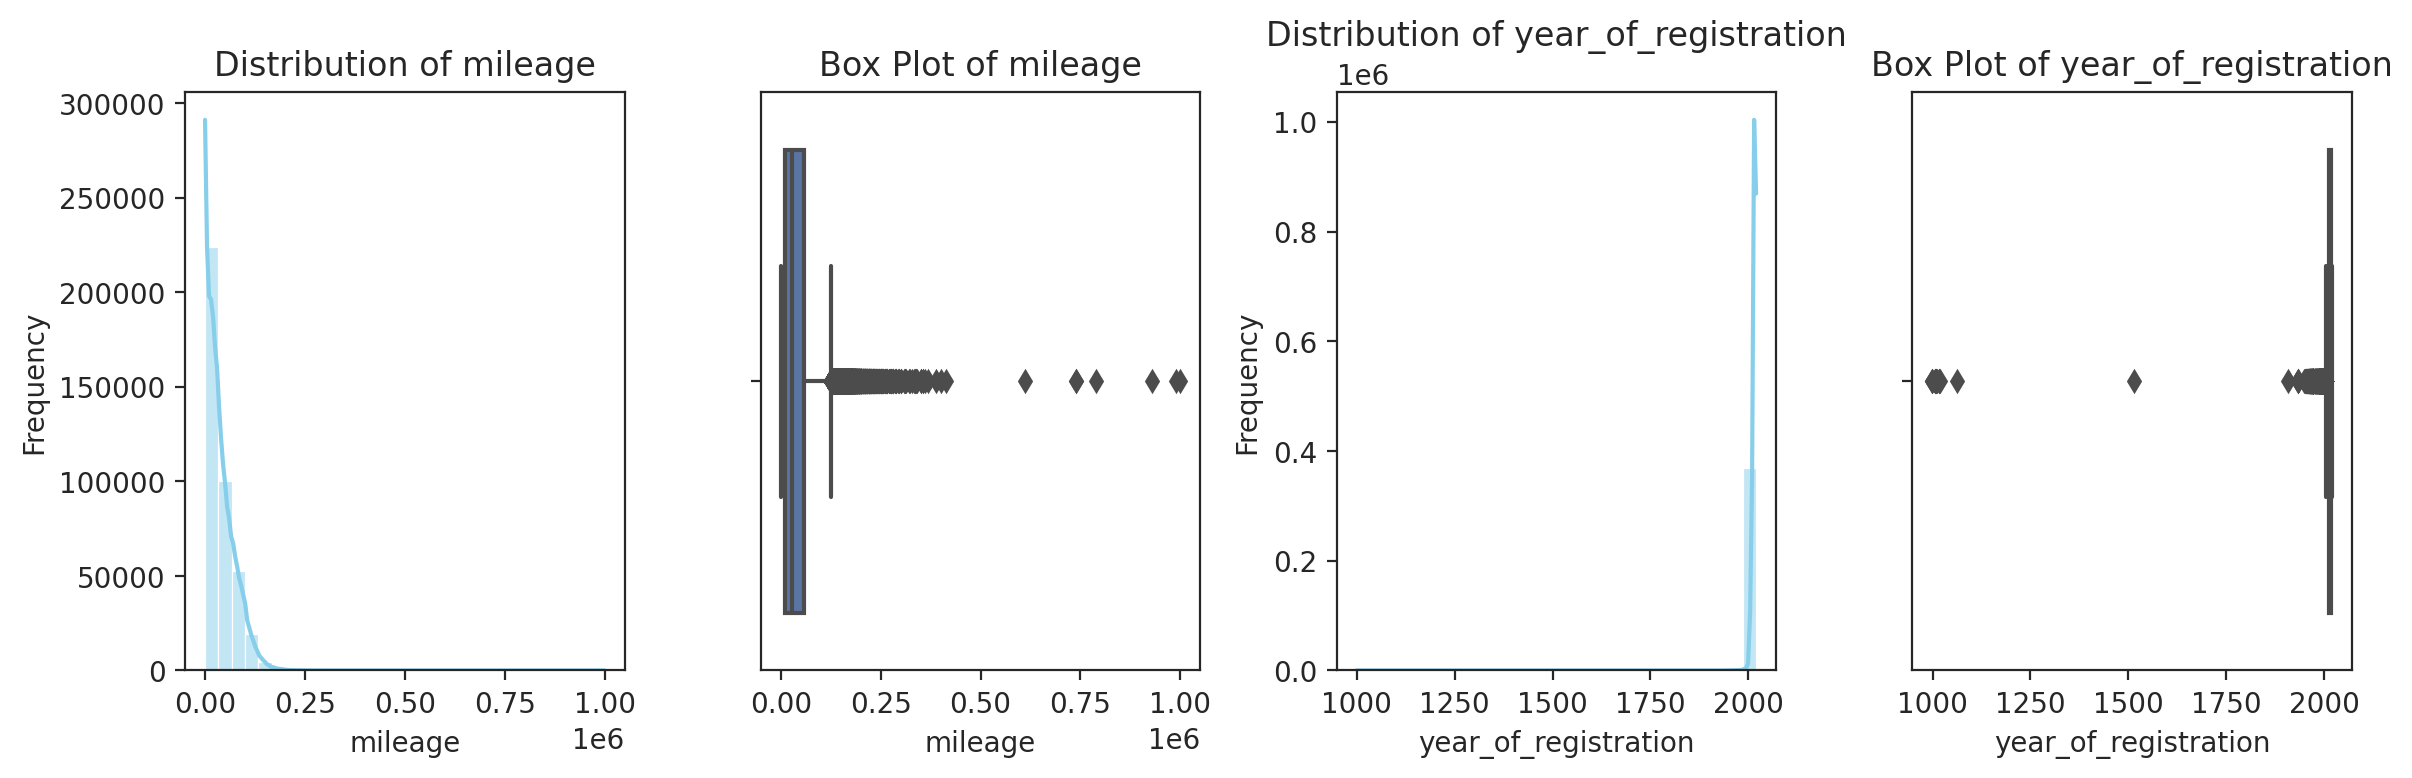

In [20]:
%matplotlib inline

# Set up a 1x4 subplot layout (1 rows, 4 columns)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Loop through each variable and analyze its distribution
for i, column in enumerate(df1[num].columns):
    # Display basic statistics
    print(f"\nAnalysis of {column}:")
    print(df1[num][column].describe())

    # Visualize the distribution using a histogram in the first row
    sns.histplot(df1[num][column], bins=30, kde=True, color='skyblue', ax=axes[i*2])
    axes[i*2].set_title(f'Distribution of {column}')
    axes[i*2].set_xlabel(column)
    axes[i*2].set_ylabel('Frequency')

    # Add a box plot to the second row
    sns.boxplot(x=df1[num][column], ax=axes[i*2+1], showfliers=True)
    axes[i*2+1].set_title(f'Box Plot of {column}')
    axes[i*2+1].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


Analysis of vehicle_condition:
count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object

Analysis of standard_colour:
count     396627
unique        22
top        Black
freq       86287
Name: standard_colour, dtype: object

Analysis of fuel_type:
count     401404
unique         9
top       Petrol
freq      216929
Name: fuel_type, dtype: object

Analysis of body_type:
count        401168
unique           16
top       Hatchback
freq         167315
Name: body_type, dtype: object


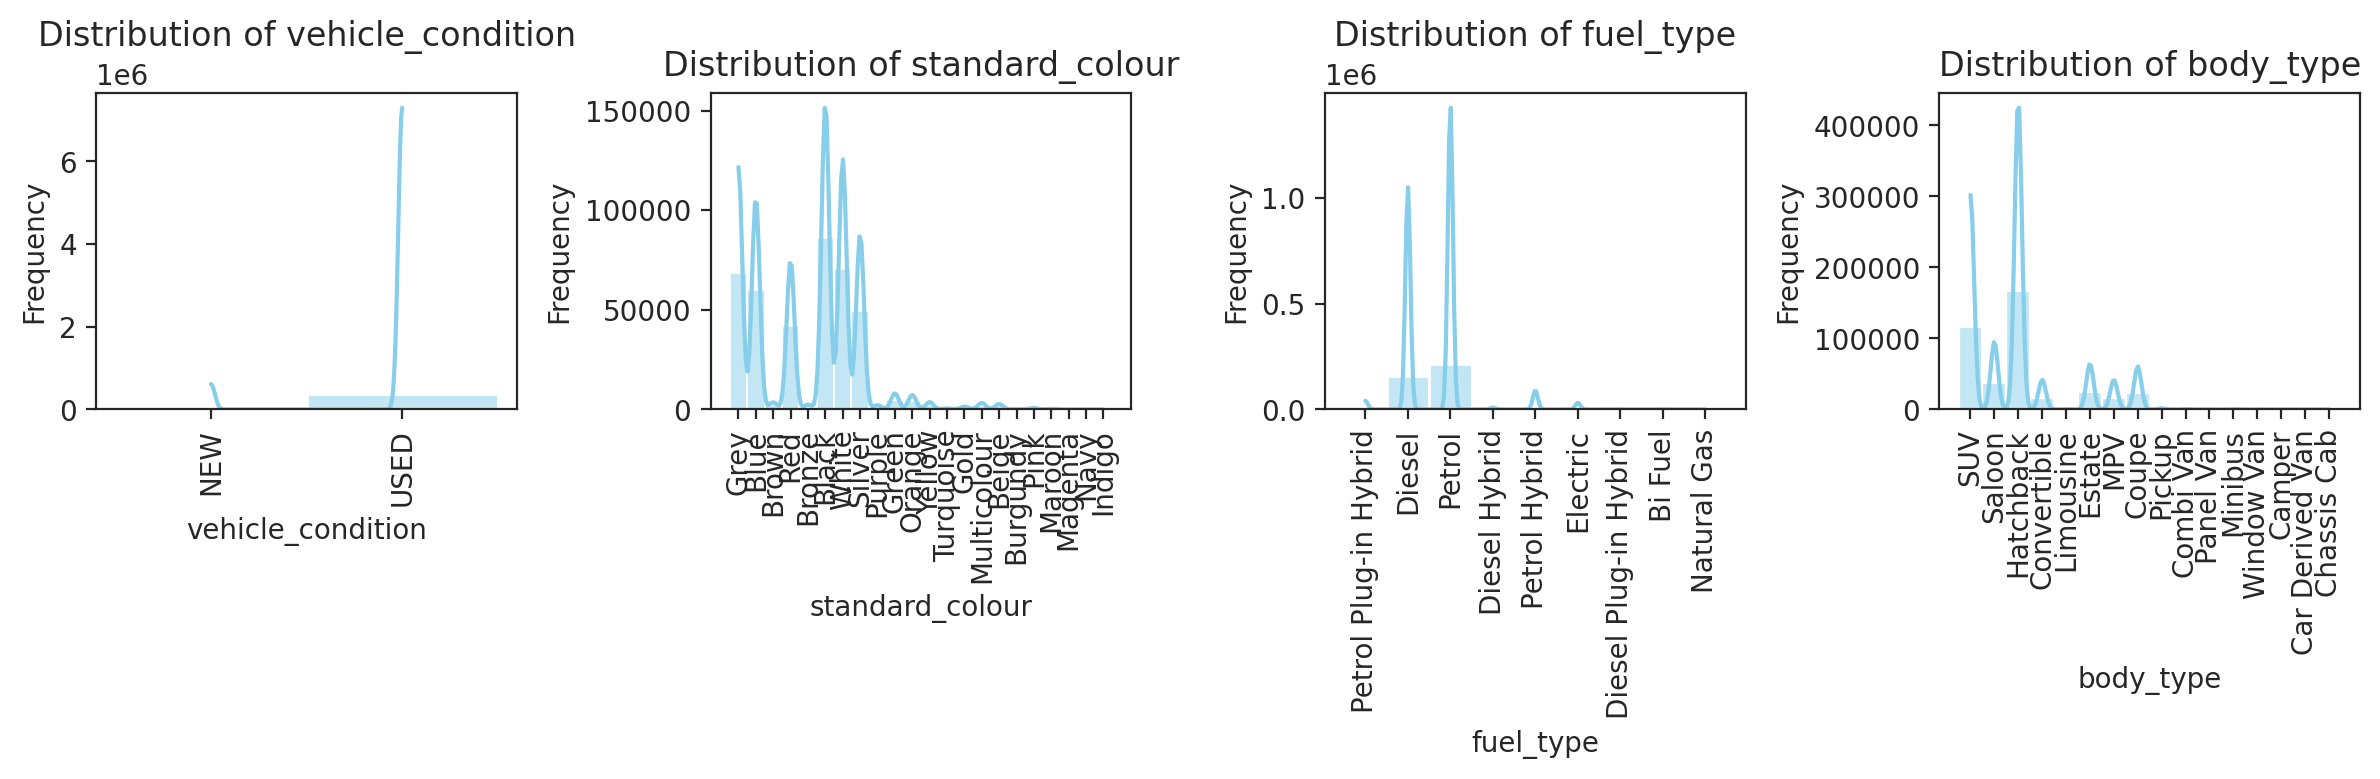

In [27]:
# Distribution plot for categorical features
%matplotlib inline
df_cat = df1[['vehicle_condition','standard_colour', 'fuel_type', 'body_type' ]]

# Set up a 1x4 subplot layout (1 rows, 4 columns)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Randomly sample a subset of your data (adjust the sample size as needed)
# sample_size = 50

# Loop through each variable and analyze its distribution

for i, column in enumerate(df_cat.columns):
    # Display basic statistics
    print(f"\nAnalysis of {column}:")
    print(df_cat[column].describe())

    # Sample the data for the current feature
    # sampled_data = df_cat[column].sample(n=sample_size, random_state=42)

    sns.histplot(df_cat[column], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:

# Check info
df_aut.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


<Axes: xlabel='standard_make', ylabel='Count'>

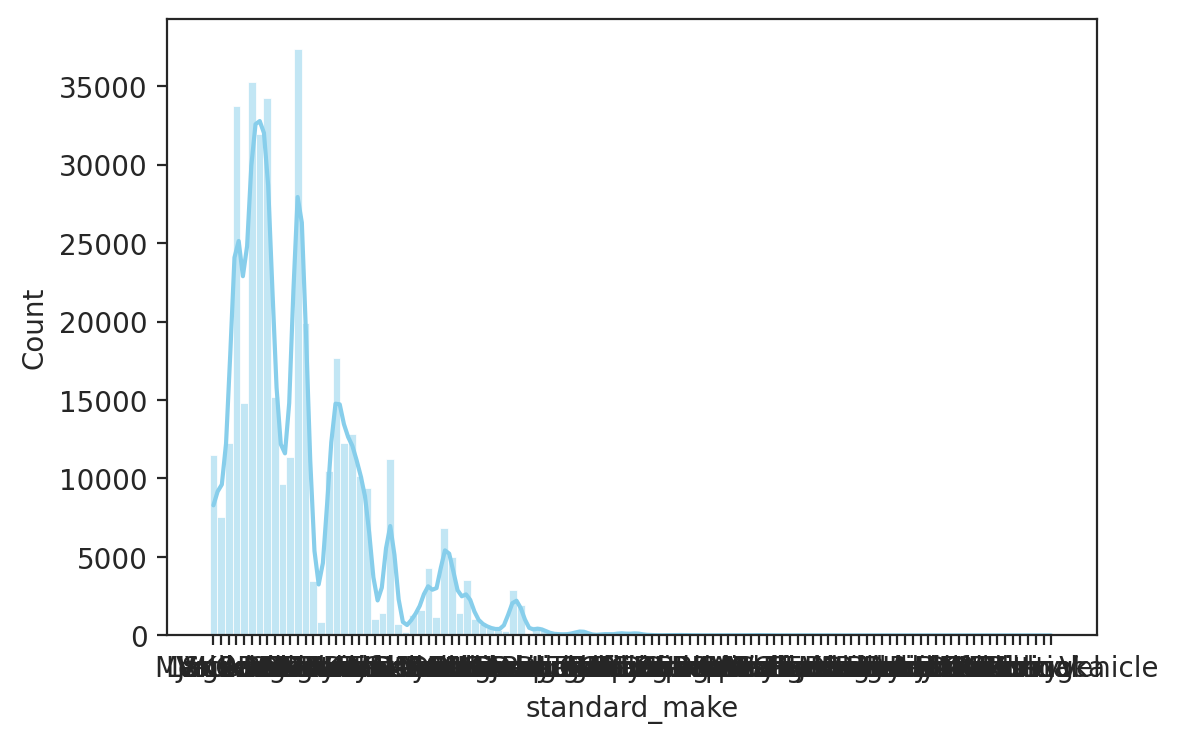

In [24]:
sns.histplot(df_cat['standard_make'], bins=30, kde=True, color='skyblue')
    # axes[i*2].set_title(f'Distribution of {column}')
    # axes[i*2].set_xlabel(column)
    # axes[i*2].set_ylabel('Frequency')

In [ ]:
aut_1 = df_aut

In [ ]:
# Split features to numeric and categorical
num_feat = ['mileage', 'year_of_registration']
cat_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type']


In [ ]:
# Describe statistical summary of categorical features
print(aut_1.describe(include = 'object'))

       reg_code standard_colour standard_make standard_model  \
count    370148          396627        402005         402005   
unique       72              22           110           1168   
top          17           Black           BMW           Golf   
freq      36738           86287         37376          11583   

       vehicle_condition  body_type fuel_type  
count             402005     401168    401404  
unique                 2         16         9  
top                 USED  Hatchback    Petrol  
freq              370756     167315    216929  


In [ ]:
print(aut_1[cat_feat].value_counts())

reg_code  standard_colour  standard_make  standard_model  vehicle_condition  body_type    fuel_type
17        Black            Volkswagen     Polo            USED               Hatchback    Petrol       252
          White            Volkswagen     Polo            USED               Hatchback    Petrol       190
67        Red              Toyota         AYGO            USED               Hatchback    Petrol       187
          Blue             Nissan         Qashqai         USED               SUV          Petrol       181
          Black            Volkswagen     Polo            USED               Hatchback    Petrol       178
                                                                                                      ... 
53        Grey             Renault        Clio            USED               Hatchback    Petrol         1
                                          Kangoo          USED               MPV          Petrol         1
                                          La

In [ ]:
print(aut_1['standard_colour'].value_counts())

Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64


In [ ]:
plt.subplots(figsize = (8,4))
filtered_colour = sample_cardf[(sample_cardf['standard_colour'] )]
sns.countplot(x=)

In [ ]:
aut_1['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

In [ ]:
aut_1['standard_colour'].describe()

count     396627
unique        22
top        Black
freq       86287
Name: standard_colour, dtype: object

In [ ]:
aut_1['standard_colour'].value_counts()

Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
for column in aut_1.select_dtypes(include='object').columns:
    contingency_table = pd.crosstab(aut_1[column], aut_1['price'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'{column}: p-value = {p}')


reg_code: p-value = 1.0
standard_colour: p-value = 0.0
standard_make: p-value = 0.0
standard_model: p-value = 0.0
vehicle_condition: p-value = 0.0
body_type: p-value = 1.0
fuel_type: p-value = 0.0


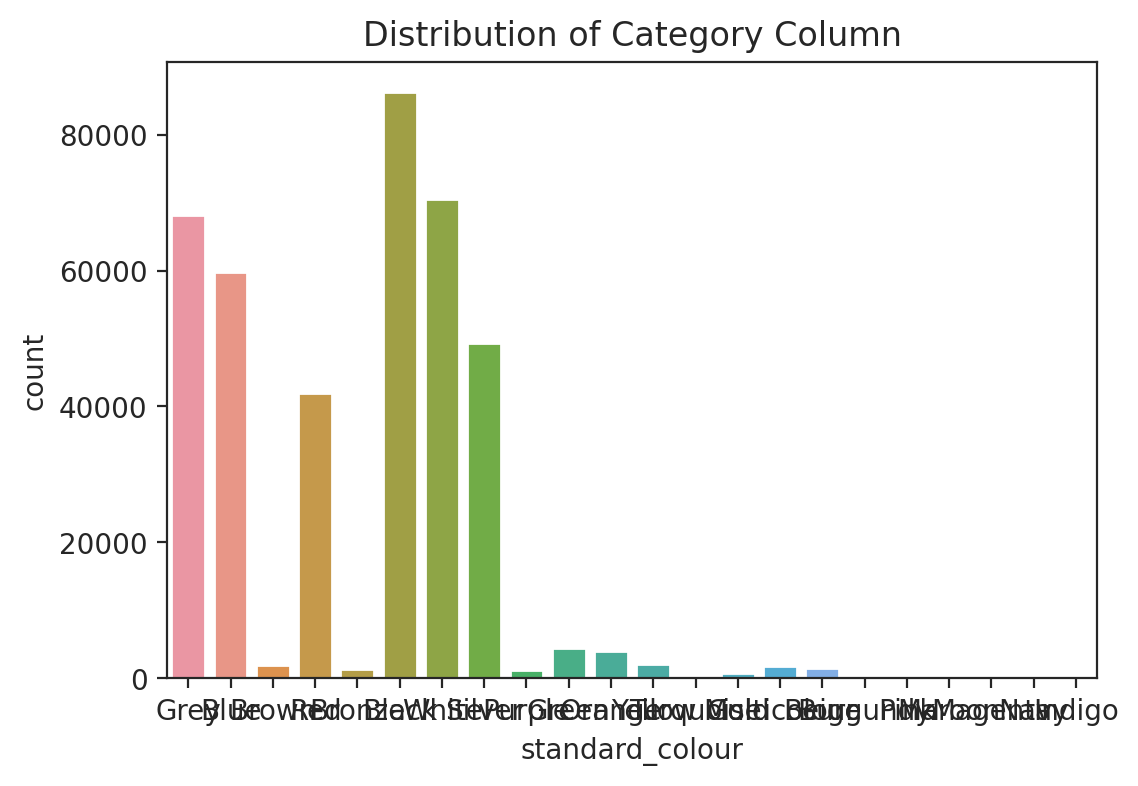

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'category_column' is your categorical feature
sns.countplot(x='standard_colour', data=aut_1)
plt.title('Distribution of Category Column')
plt.show()

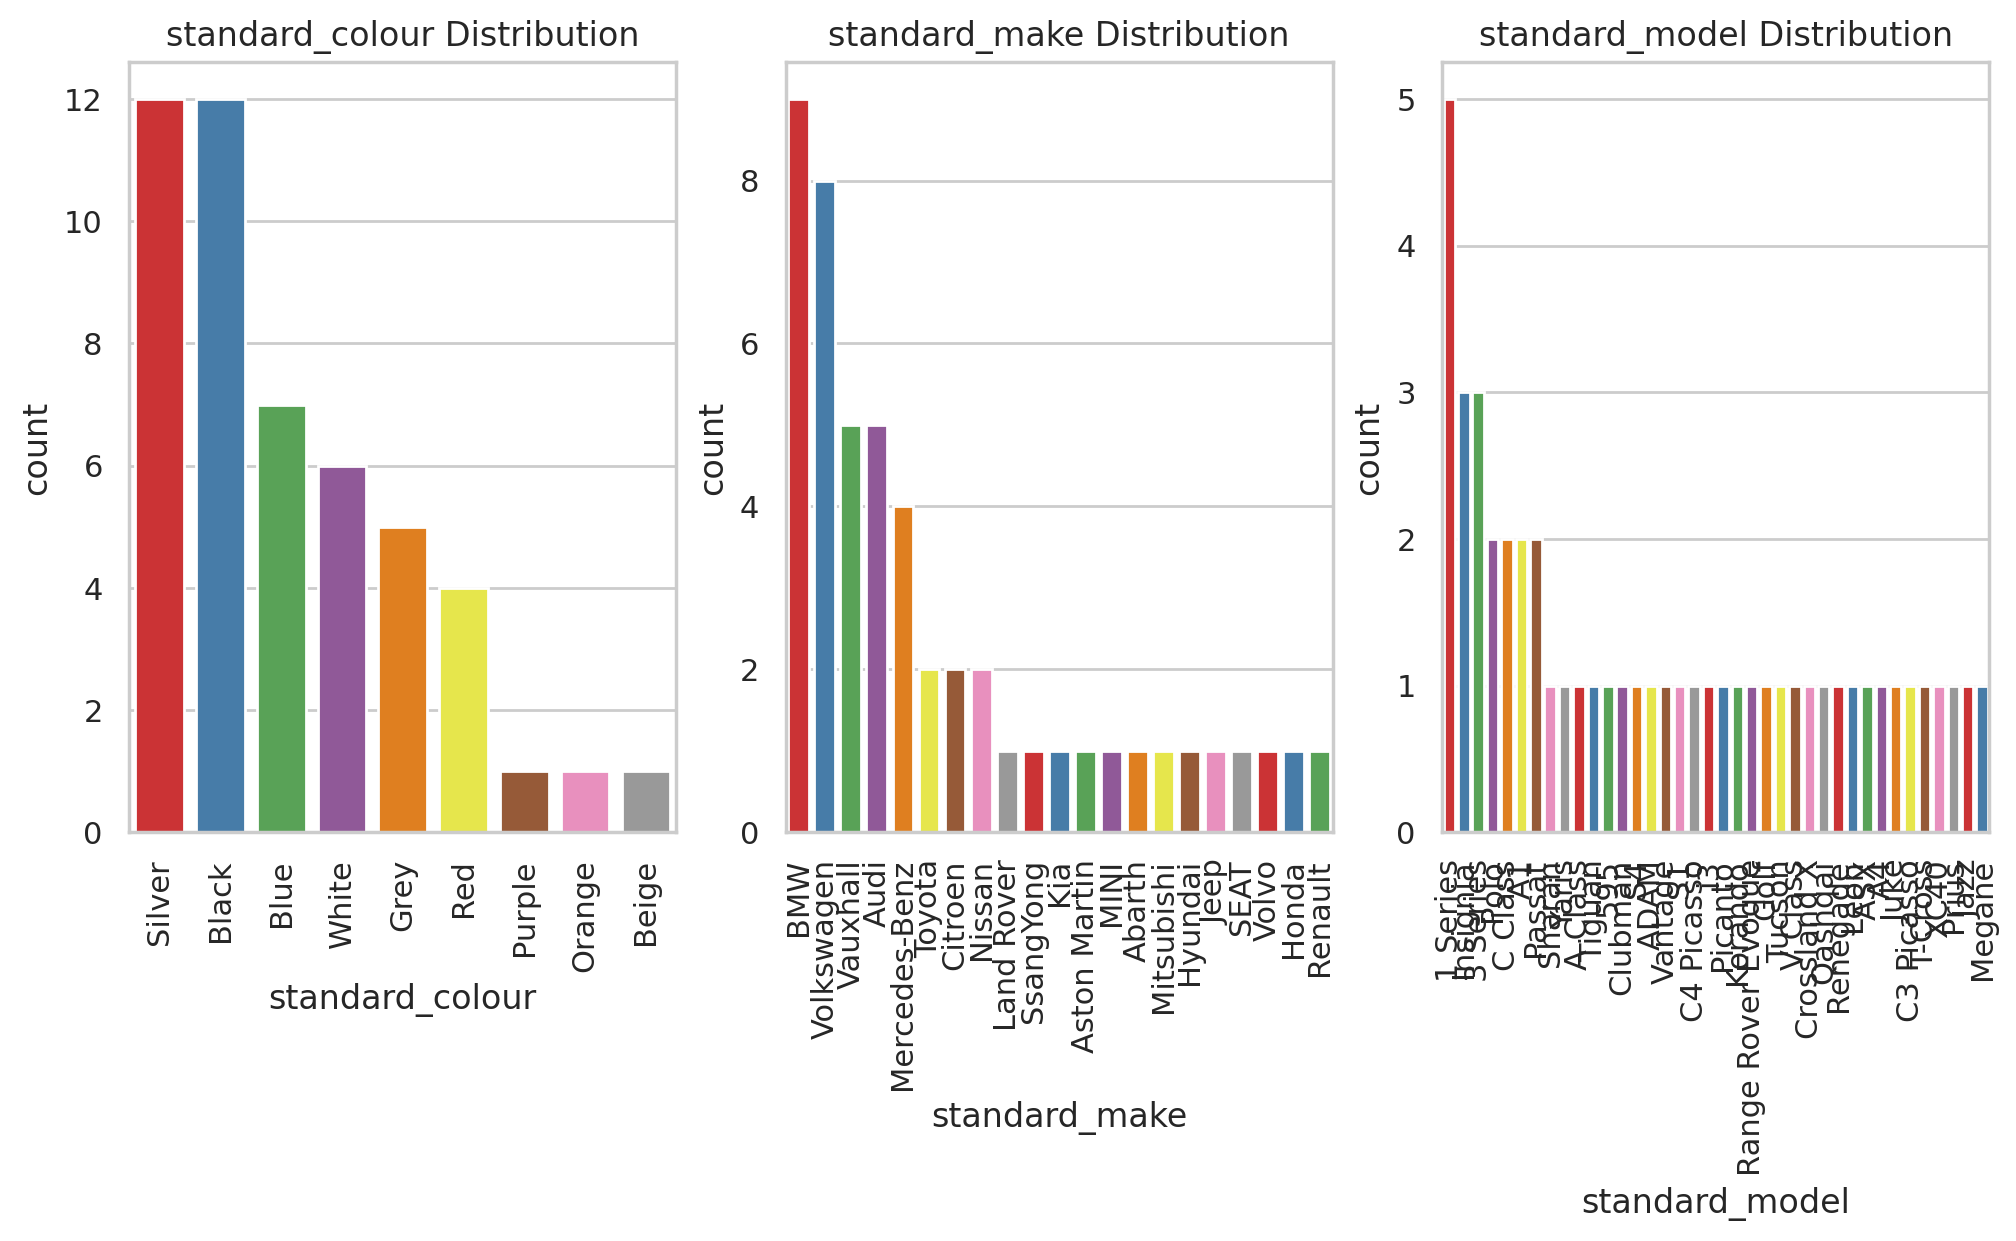

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'categorical_features' is a list of your categorical features
categorical_features = ['standard_colour', 'standard_make', 'standard_model']

# Randomly sample a subset of your data (adjust the sample size as needed)
sample_size = 50

# Create subplots with one row and a number of columns equal to the number of categorical features
fig, axes = plt.subplots(1, len(categorical_features), figsize=(12, 5))

for i, feature in enumerate(categorical_features):
    # Sample the data for the current feature
    sampled_data = aut_1[feature].sample(n=sample_size, random_state=42)

    # Create a count plot for the current feature on the corresponding subplot
    sns.countplot(x=sampled_data, order=sampled_data.value_counts().index, palette="Set1", ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)


plt.show()


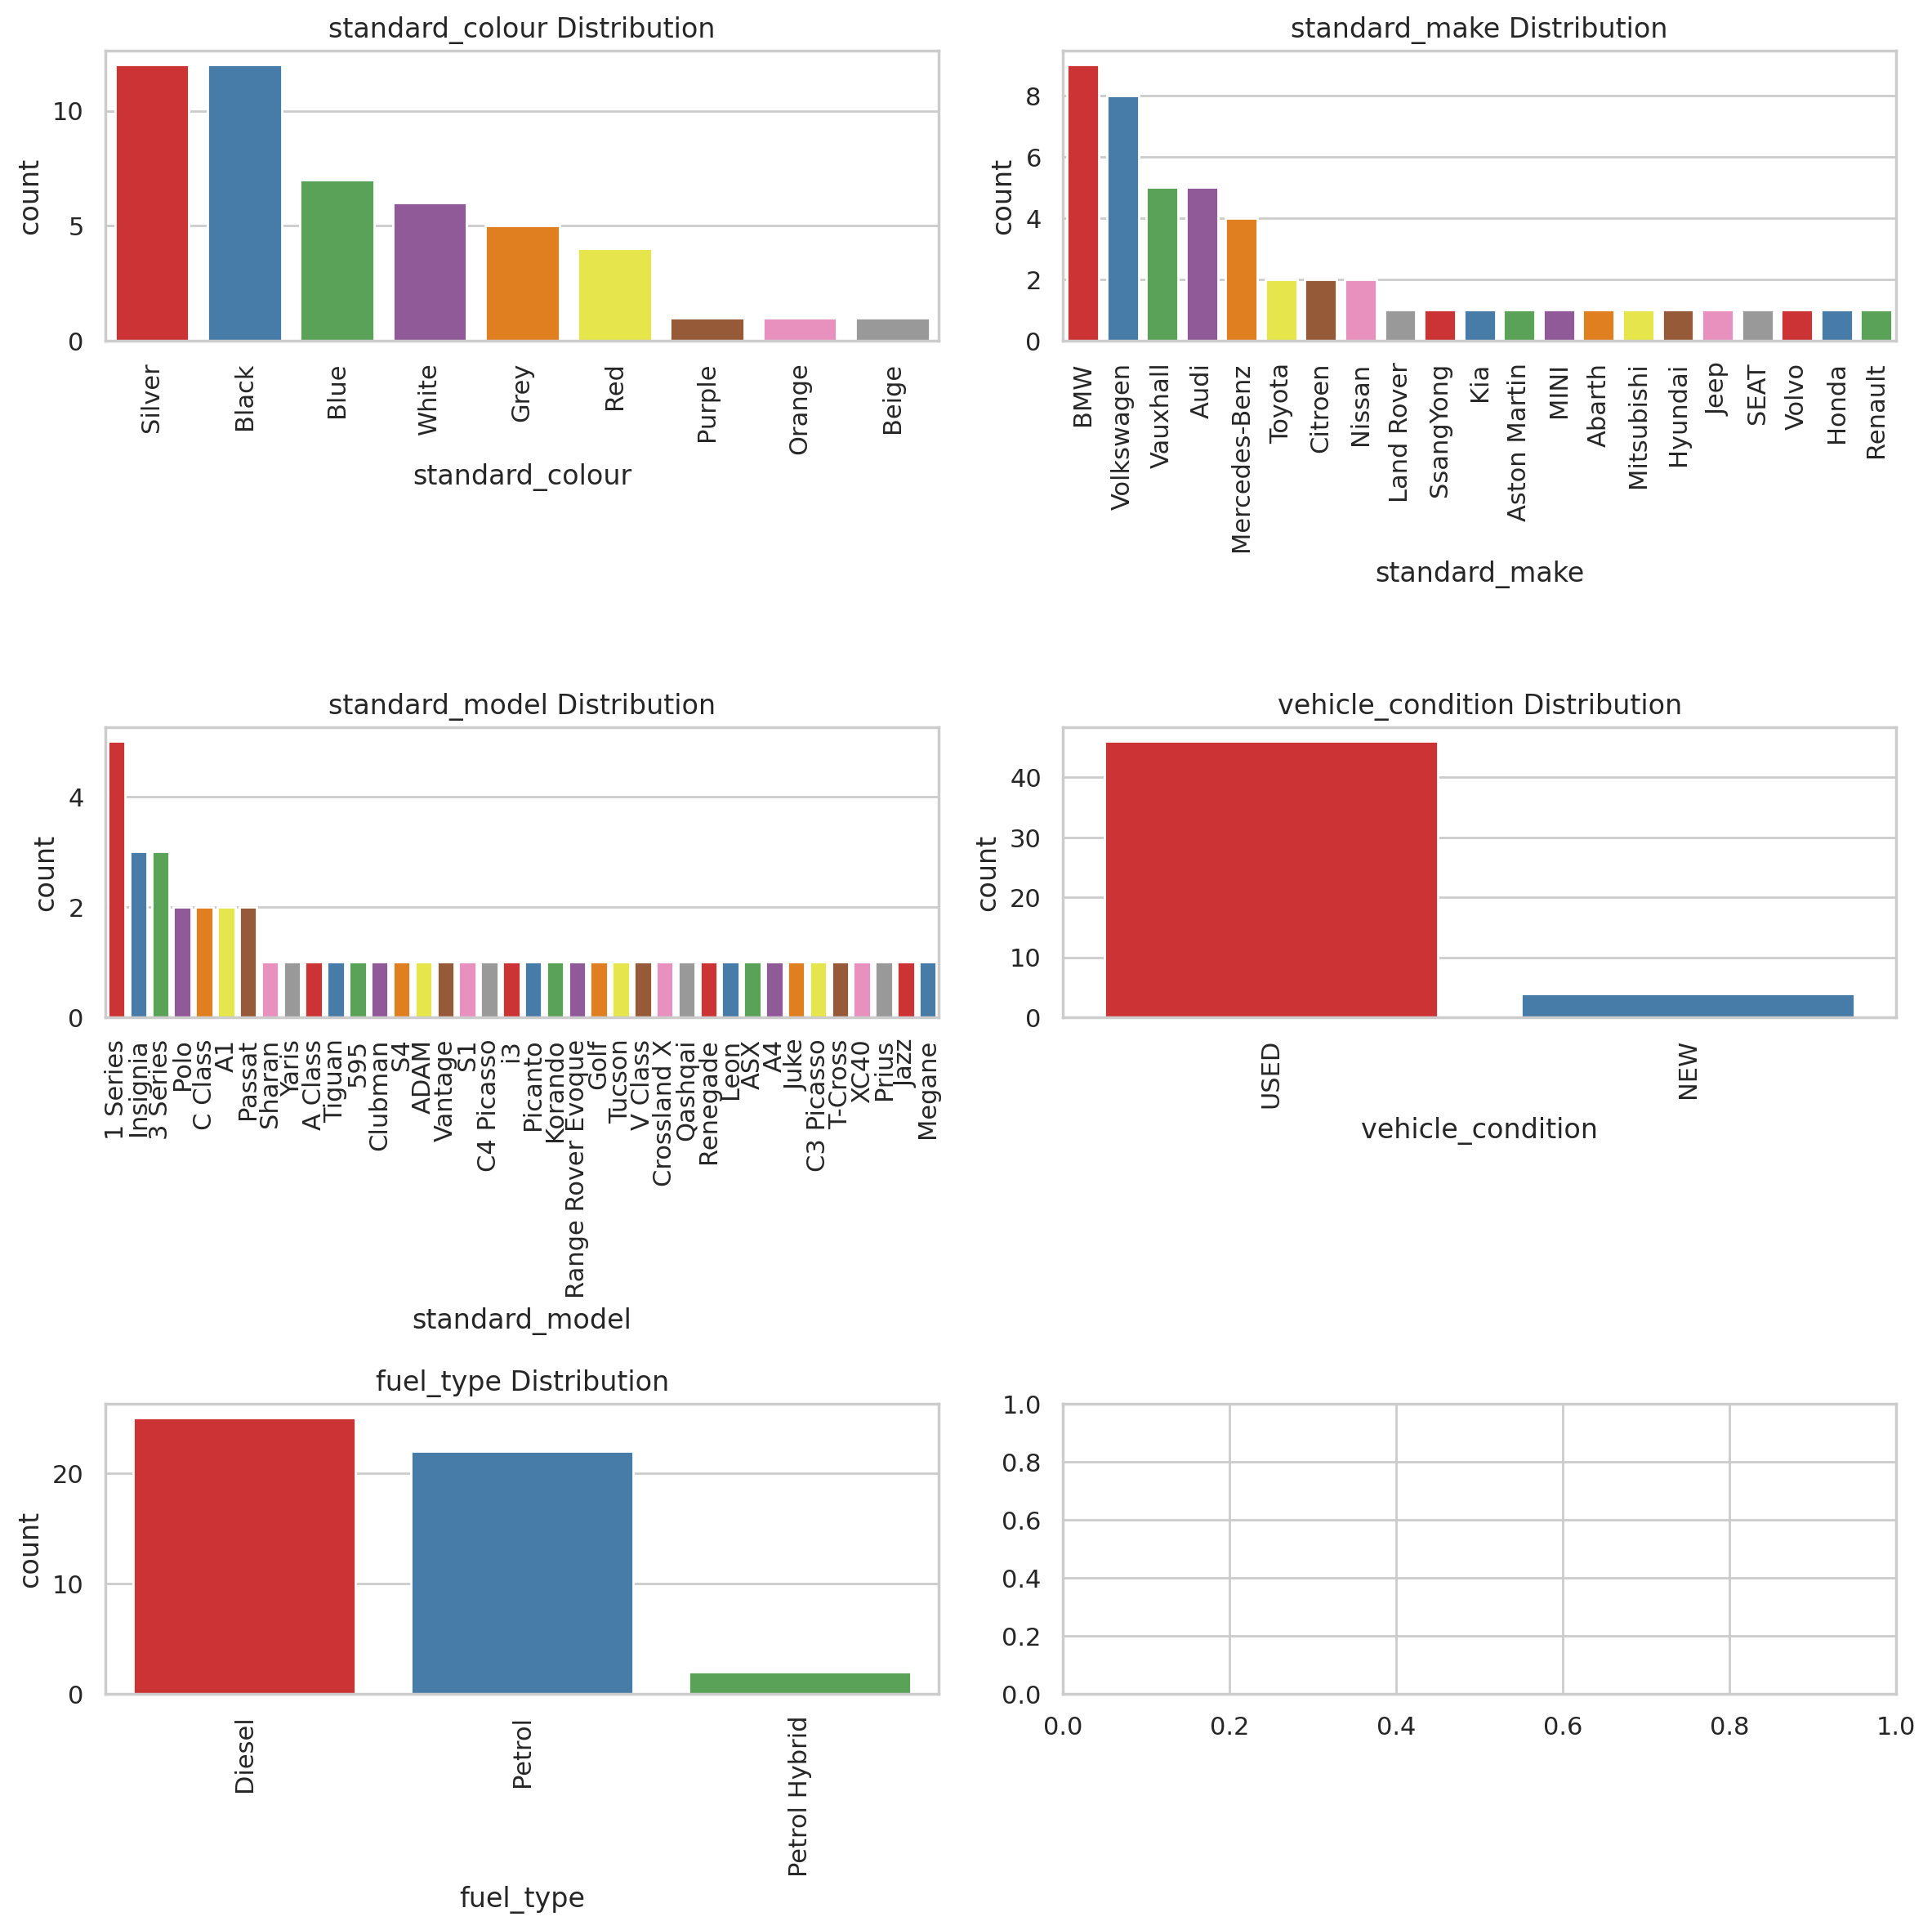

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'categorical_features' is a list of your categorical features
categorical_features = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'fuel_type']

# Randomly sample a subset of your data (adjust the sample size as needed)
sample_size = 50


# Calculate the number of rows and columns for the subplots grid
num_rows = 3
num_cols = 2

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array to simplify indexing in the loop
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Sample the data for the current feature
    sampled_data = aut_1[feature].sample(n=sample_size, random_state=42)

    # Create a count plot for the current feature on the corresponding subplot
    sns.countplot(x=sampled_data, order=sampled_data.value_counts().index, palette="Set1", ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

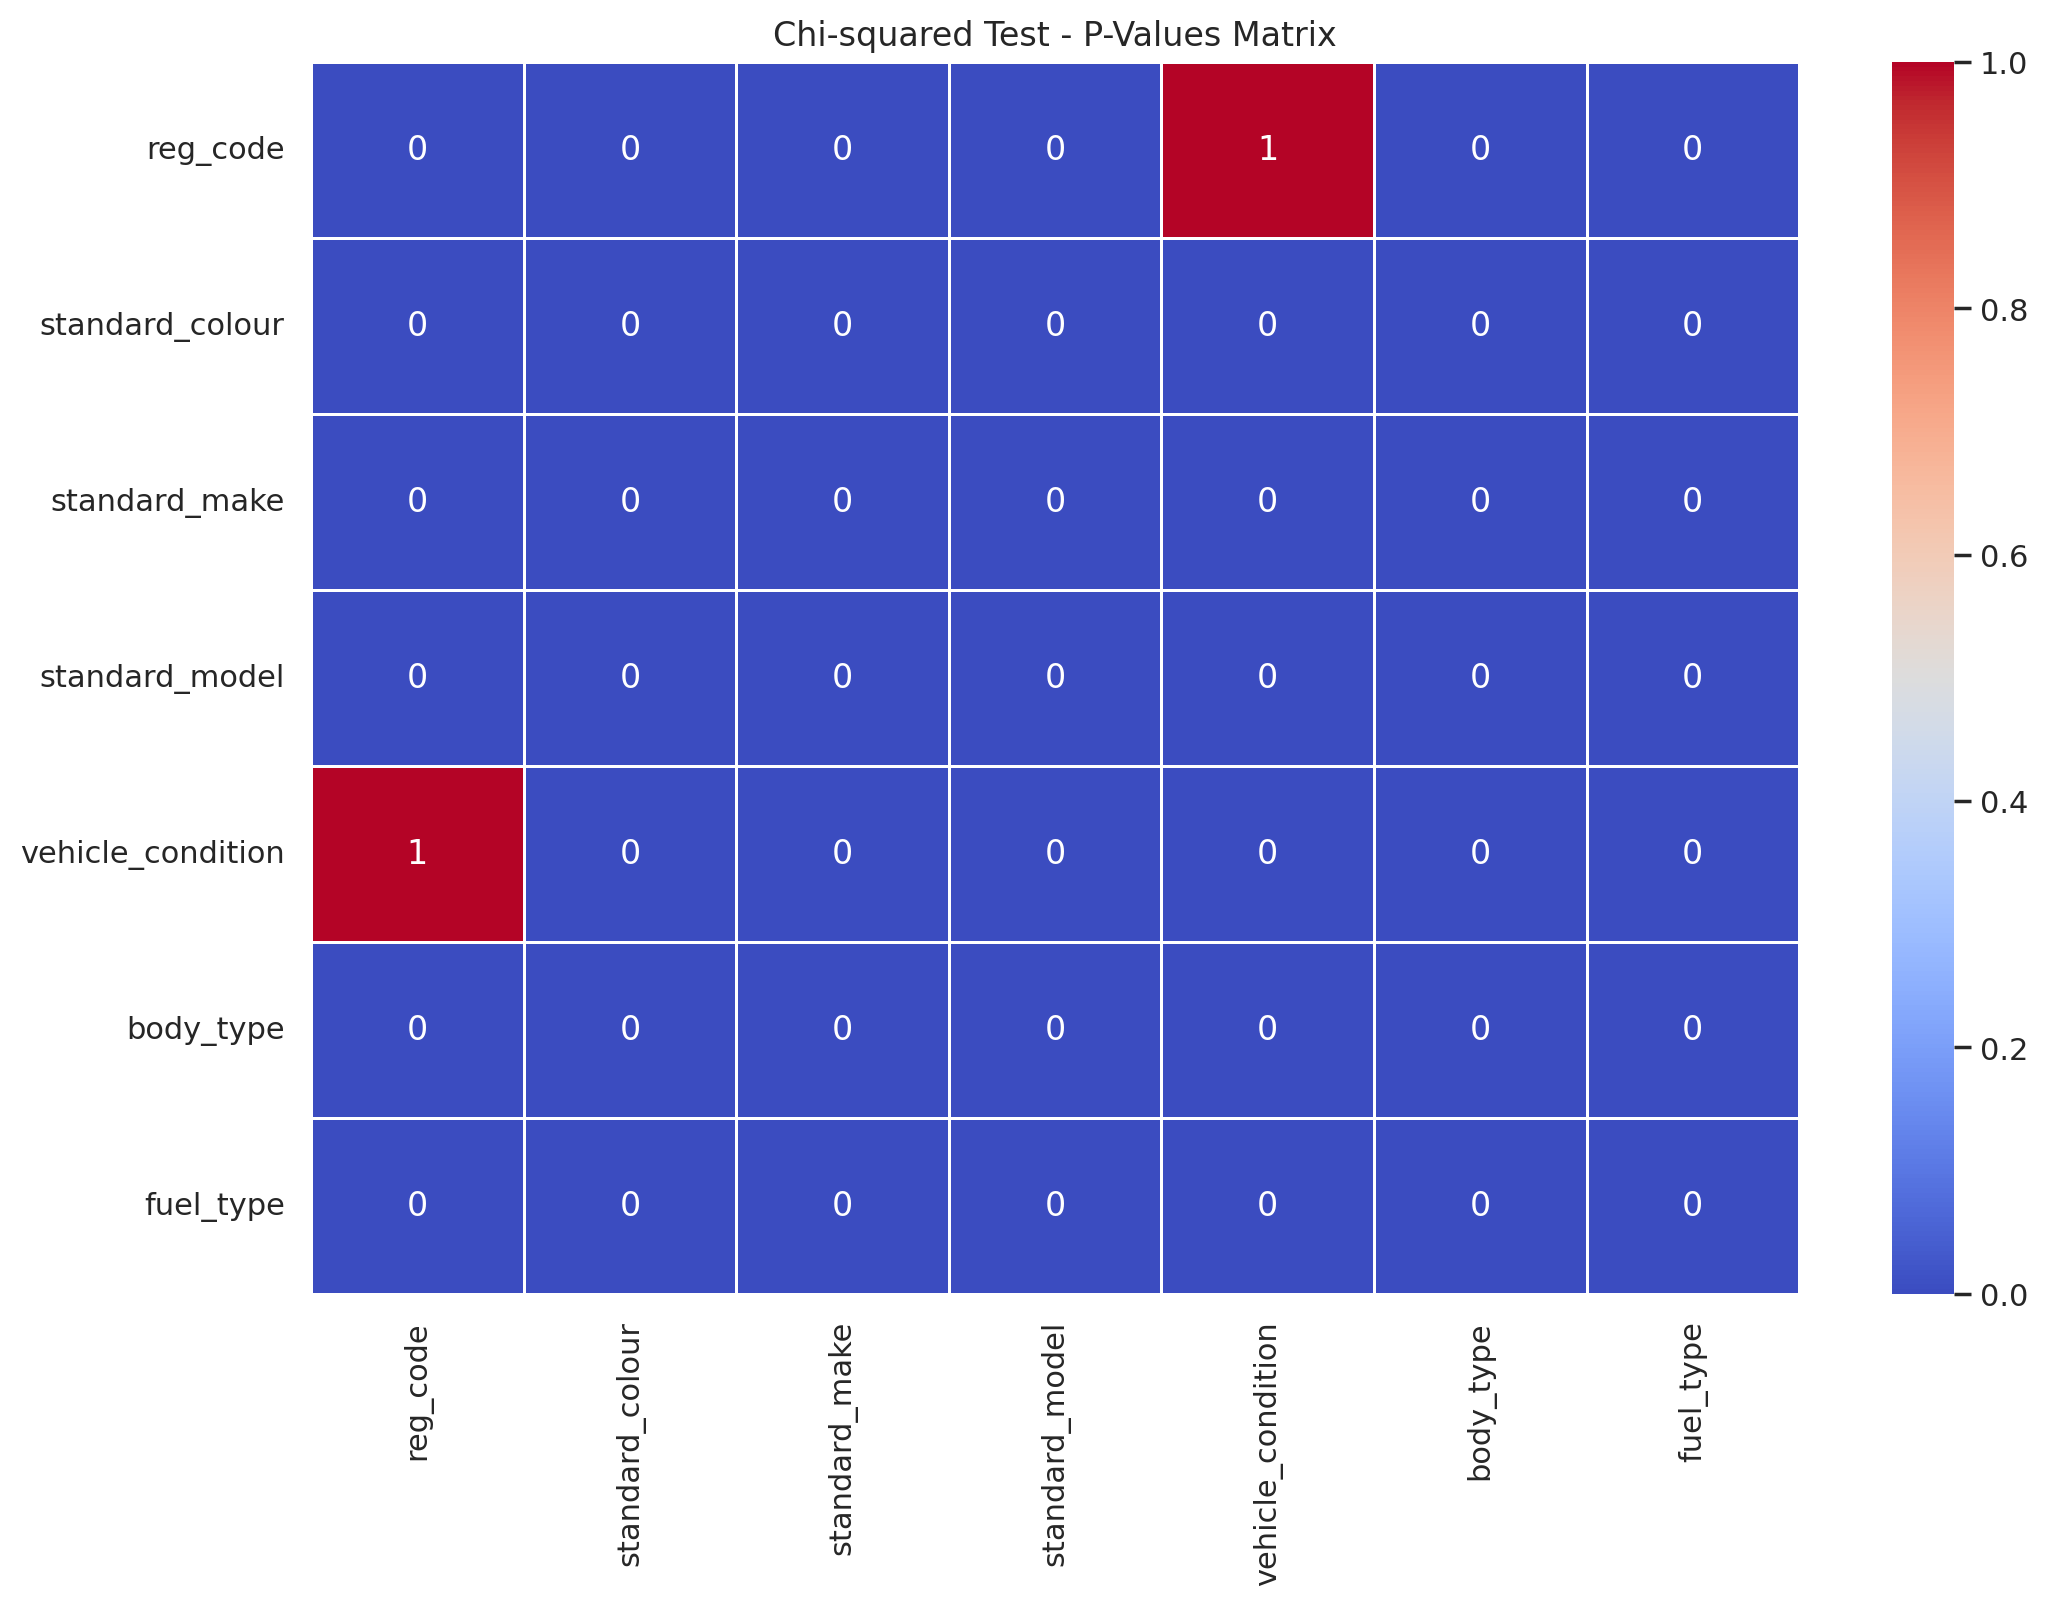

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame with object-type features
object_features = aut_1.select_dtypes(include='object')

# Create a matrix of p-values for the Chi-squared test
chi2_p_values = pd.DataFrame(index=object_features.columns, columns=object_features.columns)

for i in object_features.columns:
    for j in object_features.columns:
        contingency_table = pd.crosstab(object_features[i], object_features[j])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_p_values.loc[i, j] = p

# Visualize the matrix of p-values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_p_values.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Chi-squared Test - P-Values Matrix")
plt.show()


In [ ]:
# create a mask to sample most frequent features
freq_std_model = aut_1['standard_model'].value_counts().head(7).index.tolist()
mask1 = aut_1['standard_model'].isin(freq_std_model)

freq_std_col = aut_1['standard_colour'].value_counts().head(6).index.tolist()
mask2 = aut_1['standard_colour'].isin(freq_std_col)

freq_std_make = aut_1['standard_make'].value_counts().head(8).index.tolist()
mask3 = aut_1['standard_make'].isin(freq_std_make)

freq_year_reg = aut_1['year_of_registration'].value_counts().head(19).index.tolist()
mask4 = aut_1['year_of_registration'].isin(freq_year_reg)

# Combine masks using logical AND

subset_df = aut_1[mask1 & mask2 & mask3 & mask4]


In [ ]:
subset_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
16,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel
18,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol
20,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol
21,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel
30,202010155027121,17020.0,17,Grey,Vauxhall,Corsa,USED,2017.0,6795,Hatchback,False,Petrol


In [ ]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57012 entries, 16 to 402002
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       57012 non-null  int64  
 1   mileage                56997 non-null  float64
 2   reg_code               57004 non-null  object 
 3   standard_colour        57012 non-null  object 
 4   standard_make          57012 non-null  object 
 5   standard_model         57012 non-null  object 
 6   vehicle_condition      57012 non-null  object 
 7   year_of_registration   57012 non-null  float64
 8   price                  57012 non-null  int64  
 9   body_type              57000 non-null  object 
 10  crossover_car_and_van  57012 non-null  bool   
 11  fuel_type              56998 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
# Drop High Cardinality columns:
df1 = subset_df.drop(columns = ['public_reference','reg_code'])
df1.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
16,52023.0,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel
18,29500.0,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol
20,35300.0,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol
21,47299.0,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel
30,17020.0,Grey,Vauxhall,Corsa,USED,2017.0,6795,Hatchback,False,Petrol


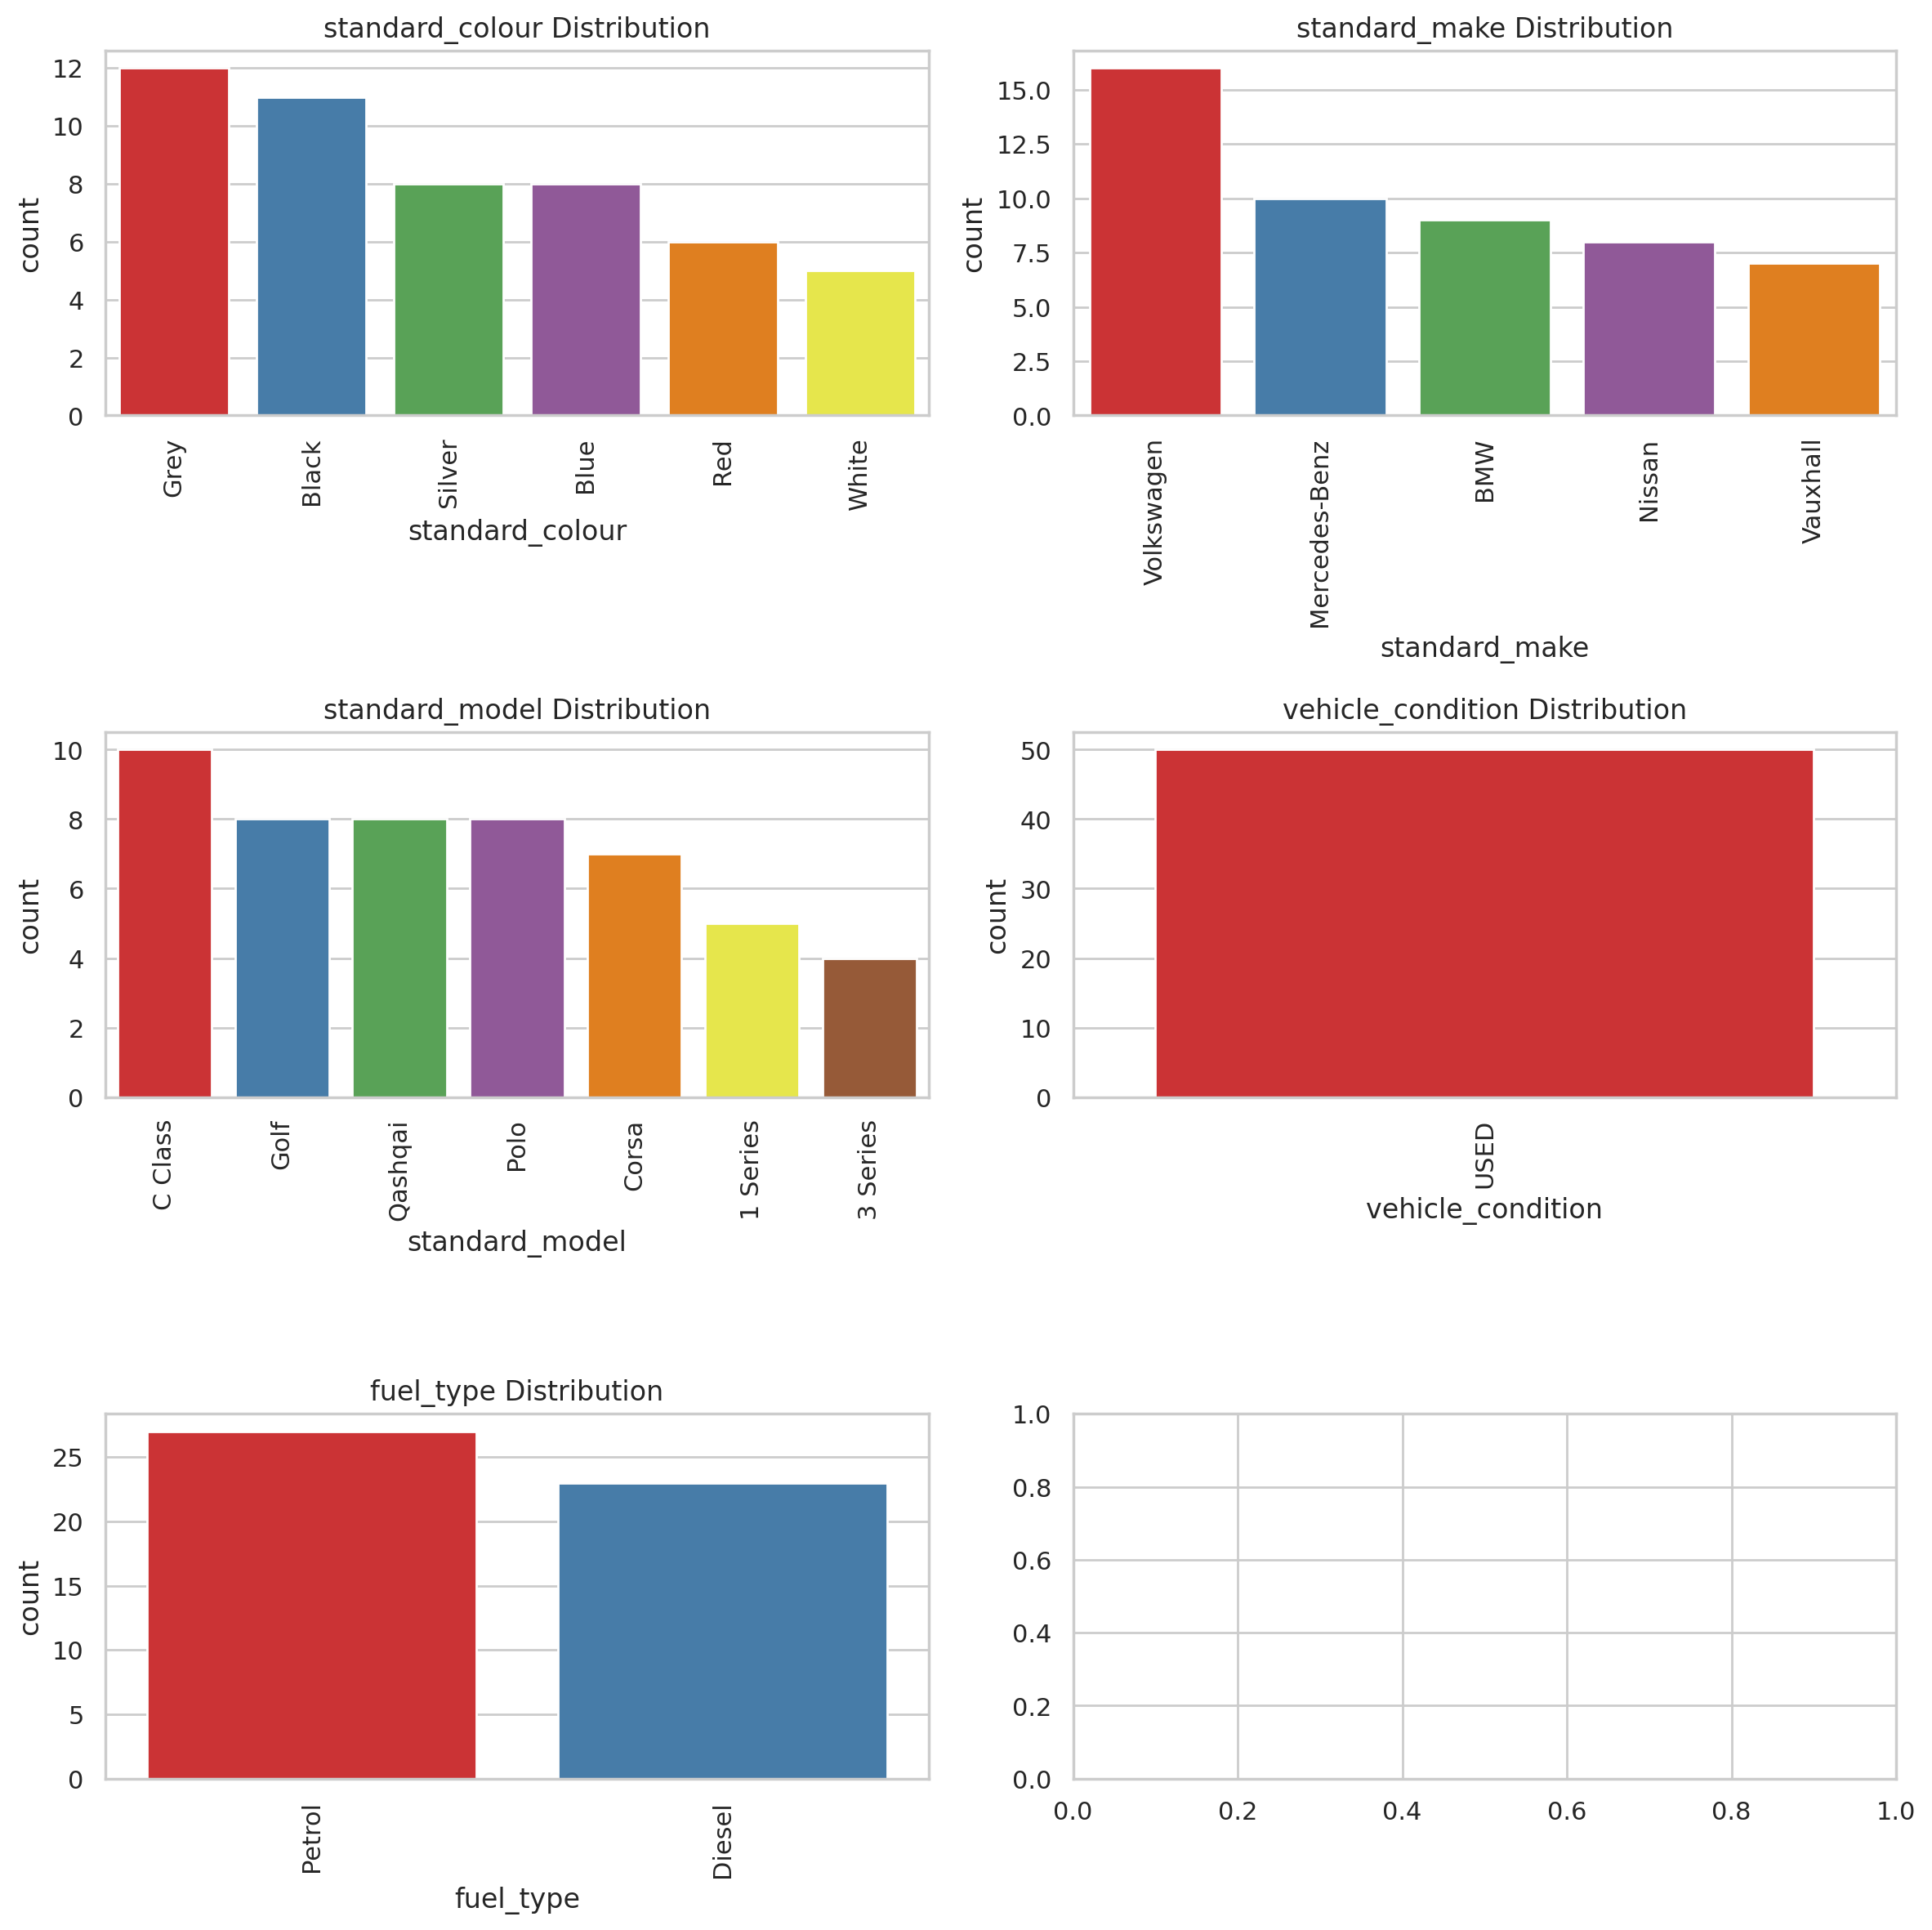

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'categorical_features' is a list of your categorical features
categorical_features = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'fuel_type']

# Randomly sample a subset of your data (adjust the sample size as needed)
sample_size = 50


# Calculate the number of rows and columns for the subplots grid
num_rows = 3
num_cols = 2

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array to simplify indexing in the loop
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Sample the data for the current feature
    sampled_data = df1[feature].sample(n=sample_size, random_state=42)

    # Create a count plot for the current feature on the corresponding subplot
    sns.countplot(x=sampled_data, order=sampled_data.value_counts().index, palette="Set1", ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [ ]:
# Split features to numeric and categorical
num_feat = ['mileage', 'year_of_registration']
cat_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type']

# Split data set
y = df1['price']
X =df1.drop('price', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split to numeric and categorical

X_train_cat = X_train[cat_feat]
X_test_cat = X_test[cat_feat]


X_train_num = X_train[num_feat]
X_test_num = X_test[num_feat]







In [ ]:
X_train_num.head()

,mileage,year_of_registration
214842,29600.0,2017.0
311252,91721.0,2013.0
318630,37401.0,2017.0
127079,19632.0,2018.0
295390,5000.0,2020.0


In [ ]:

mean = X_train_num.mean().round(1)
X_train_num = X_train_num.replace(0.0, mean )
X_train_num = X_train_num.replace(np.nan, mean )

X_train_num.head()

,mileage,year_of_registration
214842,29600.0,2017.0
311252,91721.0,2013.0
318630,37401.0,2017.0
127079,19632.0,2018.0
295390,5000.0,2020.0


In [ ]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321604 entries, 214842 to 121958
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               321604 non-null  float64
 1   year_of_registration  321604 non-null  float64
dtypes: float64(2)
memory usage: 7.4 MB


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


In [ ]:
X_train_scaled.head()

,mileage,year_of_registration
214842,-0.284554,0.255647
311252,1.544860,-0.254771
318630,-0.054821,0.255647
127079,-0.578104,0.383251
295390,-1.009005,0.638460


In [ ]:
# Correlation analysis
correlation_matrix = df1.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        mileage  year_of_registration     price  \
mileage                1.000000             -0.375541 -0.160204   
year_of_registration  -0.375541              1.000000  0.102341   
price                 -0.160204              0.102341  1.000000   
crossover_car_and_van  0.033543             -0.011155  0.010402   

                       crossover_car_and_van  
mileage                             0.033543  
year_of_registration               -0.011155  
price                               0.010402  
crossover_car_and_van               1.000000  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Feature importance using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_num.columns)
selected_features_rf = feature_importances.nlargest(2).index
print("\nSelected Features (Random Forest):", selected_features_rf)


Selected Features (Random Forest): Index(['mileage', 'year_of_registration'], dtype='object')


In [ ]:
mode = X_train_cat [cat_feat].mode().iloc[0]
X_train_cat = X_train_cat .replace(np.nan, mode )

In [ ]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321604 entries, 214842 to 121958
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   reg_code           321604 non-null  object
 1   standard_colour    321604 non-null  object
 2   standard_make      321604 non-null  object
 3   standard_model     321604 non-null  object
 4   vehicle_condition  321604 non-null  object
 5   body_type          321604 non-null  object
 6   fuel_type          321604 non-null  object
dtypes: object(7)
memory usage: 19.6+ MB


In [ ]:

# Assuming 'categorical_feature' is the name of your categorical column
df_encoded = pd.get_dummies(X_train_cat , columns= cat_feat)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'target_variable' is the name of your target variable
X = df_encoded.drop('target_variable', axis=1)
y = df_encoded['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


In [ ]:
df_encoded.i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Columns: 1403 entries, mileage to fuel_type_Petrol Plug-in Hybrid
dtypes: bool(1), float64(2), int64(1), uint8(1399)
memory usage: 545.9 MB


In [ ]:
("scaler", StandardScaler())

('scaler', StandardScaler())

In [ ]:
# fill missing value with mean - numerical features

mean = df1[num_feat].mean().round(1)
df1[num_feat] = df1[num_feat].replace(0.0, mean )
df1[num_feat] = df1[num_feat].replace(np.nan, mean )

In [ ]:
df1.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,37743.6,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
# fiil missing values with mode - categorical features

mode = df1[cat_feat].mode().iloc[0]
df1[cat_feat] = df1[cat_feat].replace(np.nan, mode )

In [ ]:
X_train_cat.head()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
214842,67,Grey,Mercedes-Benz,E Class,USED,Convertible,Diesel
311252,13,Purple,Peugeot,208,USED,Hatchback,Petrol
318630,17,Blue,Hyundai,Tucson,USED,SUV,Diesel
127079,68,Grey,Volvo,XC60,USED,SUV,Petrol
295390,20,Grey,Volkswagen,Golf,USED,Hatchback,Petrol


In [ ]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321604 entries, 214842 to 121958
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   reg_code           321604 non-null  object
 1   standard_colour    321604 non-null  object
 2   standard_make      321604 non-null  object
 3   standard_model     321604 non-null  object
 4   vehicle_condition  321604 non-null  object
 5   body_type          321604 non-null  object
 6   fuel_type          321604 non-null  object
dtypes: object(7)
memory usage: 19.6+ MB


In [ ]:
# Example using one-hot encoding

X_train_encoded = pd.get_dummies(X_train_cat, columns=cat_feat)


In [ ]:
correlation_matrix = X_train_encoded.corr()
target_correlation = correlation_matrix[y_train].abs().sort_values(ascending=False)
selected_features = target_correlation.index[:5]


KeyError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_encoded, y_train)
importances = model.feature_importances_
selected_features = X_train_encoded.columns[np.argsort(importances)[::-1][:5]]


KeyboardInterrupt: ignored

In [ ]:
# Create a transformer for numeric features:
# num_feat = ["mileage"]

num_xformer = Pipeline(
    steps=[

            ("scaler", StandardScaler())
          ]
)

In [ ]:
# Create a transformer for the categorical features:
# cat_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type', "year_of_registration"]

cat_xformer = Pipeline(
    steps=[

            ("encoder", TargetEncoder()),
            ("selector", SelectPercentile(chi2, percentile=50)),
          ]
)

In [ ]:
# Create a preprocessor pipeline for the transformers:
preprocessor = ColumnTransformer(
                   transformers=[
                                   ("num", num_xformer, num_feat),
                                   ("cat", cat_xformer, cat_feat)
                               ]
                            )

In [ ]:
# Spit Data
target = 'price'
X = df1[ cat_feat + num_feat ]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Append regressor to pipeline

lreg = Pipeline(
                 steps=[("preprocessor", preprocessor),
                        ("regressor", LinearRegression())]
              )

In [ ]:
lreg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder()),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x7d0574a97b50>))]),
                                                  ['reg_code',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type',
                                                   'year_of_registration'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Include grid search into the pipeline
param_grid = {

    "preprocessor__cat__selector__percentile": [10, 30, 50, 70, 90]
}

search_cv = RandomizedSearchCV(
                                lreg,
                                param_grid,
                                return_train_score=True,
                                scoring='neg_mean_absolute_error',
                                random_state=0

                              )
search_cv

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['mileage']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                TargetEncoder()),
                                                                                               ('selector',
                                                                                                SelectPercentile(percentile=50,
                                                                                                                 score_func=<function chi2 at 0x7d0574a97b50>))]),
                                                                               ['reg_code',
                                                                                'standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type',
                                                                                'year_of_registration'])])),
                                             ('regressor',
                                              LinearRegression())]),
                   param_distributions={'preprocessor__cat__selector__percentile': [10,
                                                                                    30,
                                                                                    50,
                                                                                    70,
                                                                                    90]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [ ]:
# Spit Data
target = 'price'
X = df1[ cat_feat + num_feat ]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Fit data
search_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['mileage']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                TargetEncoder()),
                                                                                               ('selector',
                                                                                                SelectPercentile(percentile=50,
                                                                                                                 score_func=<function chi2 at 0x7d0574a97b50>))]),
                                                                               ['reg_code',
                                                                                'standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type',
                                                                                'year_of_registration'])])),
                                             ('regressor',
                                              LinearRegression())]),
                   param_distributions={'preprocessor__cat__selector__percentile': [10,
                                                                                    30,
                                                                                    50,
                                                                                    70,
                                                                                    90]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [ ]:
# Print best parameter

print("Best params:")
print(search_cv.best_params_)

Best params:
{'preprocessor__cat__selector__percentile': 10}


In [ ]:
# cross validation score
print(f"Internal CV score: {search_cv.best_score_:.3f}")

Internal CV score: -8037.485


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__imputer__strategy",
        "param_preprocessor__cat__selector__percentile",

    ]
].head(10)


KeyError: ignored

In [ ]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)


dtv = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)

mean_absolute_error(y_test, dtr.predict(X_test)), mean_absolute_error(y_train, dtr.predict(X_train))


param_grid = {
    'max_depth': [ 1, 2, 3, 5, 8, 11, 13, 15 ]
}


gs = GridSearchCV(
    dtr, param_grid, return_train_score=True,
    scoring='neg_mean_absolute_error'
)


gs_results = gs.fit(X_train, y_train)

gs_df = pd.DataFrame(gs_results.cv_results_)


gs_df.columns


gs_df[['param_max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values('rank_test_score')


gap = (gs_df['mean_train_score'] - gs_df['mean_test_score']).rename('train_test_gap')



pd.concat([
        gs_df[['param_max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']],
        gap
    ], axis=1
).sort_values('train_test_gap', ascending=True)

np.linspace(2, 9, 8, dtype=int)


param_grid = {
    'max_depth': np.linspace(2, 9, 8, dtype=int)
}


gs = GridSearchCV(
    dtr, param_grid, return_train_score=True,
    scoring='neg_mean_absolute_error'
)

gs_results = gs.fit(X_train, y_train)


gs_df = pd.DataFrame(gs_results.cv_results_)


gs_df = pd.DataFrame(gs_results.cv_results_)

gap = (gs_df['mean_train_score'] - gs_df['mean_test_score']).rename('train_test_gap')


gs_df = pd.concat([
        gs_df[['param_max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']],
        gap
    ], axis=1
)
gs_df.sort_values('train_test_gap', ascending=True)

gs_df.sort_values('rank_test_score')

dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)


dtv = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)


param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [10,15,20]
}


gs = GridSearchCV(
    dtr, param_grid, return_train_score=True,
    scoring='neg_mean_absolute_error'
)


gs_results = gs.fit(X_train, y_train)


gs_df = pd.DataFrame(gs_results.cv_results_)


gap = (gs_df['mean_train_score'] - gs_df['mean_test_score']).rename('train_test_gap')


gs_df = pd.concat([
        gs_df[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'mean_train_score', 'rank_test_score']],
        gap
    ], axis=1
)
gs_df.sort_values('train_test_gap', ascending=True)


gs_df.sort_values('rank_test_score')



gs_df['mean_test_score'] = gs_df['mean_test_score']*-1


dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
dtr.fit(X_train, y_train)


dtv = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)

In [ ]:
# mean = df['mileage'].mean()

# df['mileage'] = df['mileage'].replace(0.0, mean )



# # mode_values = df[cat_feat].mode().iloc[0]
# # [mean_values, mode_values]




In [ ]:
cat_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model',
            'vehicle_condition', 'year_of_registration', 'body_type','fuel_type']

num_feat = ["mileage"]

mean = df[num_feat].mean().round(1)

mode_values = df[cat_feat].mode().iloc[0]
[mean, mode_values]



[mileage    39265.2
 dtype: float64,
 reg_code                       17
 standard_colour             Black
 standard_make                 BMW
 standard_model               Golf
 vehicle_condition            USED
 year_of_registration       2017.0
 body_type               Hatchback
 fuel_type                  Petrol
 Name: 0, dtype: object]

In [ ]:
df[num_feat] = df[num_feat].replace(0.0, mean )
df[num_feat] = df[num_feat].replace(np.nan, mean )


In [ ]:
df[cat_feat] = df[cat_feat].replace(np.NAN, mode_values )

In [ ]:
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,37743.6,17,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   reg_code               402005 non-null  object 
 2   standard_colour        402005 non-null  object 
 3   standard_make          402005 non-null  object 
 4   standard_model         402005 non-null  object 
 5   vehicle_condition      402005 non-null  object 
 6   year_of_registration   402005 non-null  float64
 7   price                  402005 non-null  int64  
 8   body_type              402005 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 31.1+ MB


In [ ]:
# Assume you have a target variable (replace 'Target' with your target variable)
y = df['price']

# Separate the features and the target variable
X= df.drop('price', axis=1)


In [ ]:
# encode

enc = TargetEncoder()

enc.fit(X[cat_feat],y)

X_enc = enc.transform(X[cat_feat],y)


In [ ]:
X_enc.head()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,fuel_type
0,24729.652307,20036.613452,24999.204914,40066.905105,32846.232359,2017.0,22477.751450,35986.686851
1,7660.422563,16859.234176,26422.624635,16111.920431,16035.195778,2011.0,19324.431839,16505.048387
2,24729.652307,20036.613452,13679.339198,10570.696233,16035.195778,2017.0,22477.751450,16737.310472
3,15100.592909,13278.984608,8178.179941,7835.786415,16035.195778,2016.0,10604.632707,16505.048387
4,11930.993008,20036.613452,35670.165799,42478.780992,16035.195778,2015.0,22477.751450,16505.048387


In [ ]:
result = pd.concat([X_enc, df[['mileage']]], ignore_index=True)
result.head()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,fuel_type,mileage
0,24729.652307,20036.613452,24999.204914,40066.905105,32846.232359,2017.0,22477.751450,35986.686851,NaN
1,7660.422563,16859.234176,26422.624635,16111.920431,16035.195778,2011.0,19324.431839,16505.048387,NaN
2,24729.652307,20036.613452,13679.339198,10570.696233,16035.195778,2017.0,22477.751450,16737.310472,NaN
3,15100.592909,13278.984608,8178.179941,7835.786415,16035.195778,2016.0,10604.632707,16505.048387,NaN
4,11930.993008,20036.613452,35670.165799,42478.780992,16035.195778,2015.0,22477.751450,16505.048387,NaN


In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", df[num_feat], num_feat),
        ("cat", X_enc, cat_feat),
    ]
)

In [ ]:
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                          mileage
0        37743.6
1       108230.0
2         7800.0
3        45000.0
4        64000.0
...          ...
402000    5179.0
402001  110000.0
402002   52760.0
402003   10250.0
402004   14000.0

[402005 rows x 1 columns],
                                 ['mileage']),
                                ('cat',
                                             reg_code  standard_colour  standard_make  standard_model  \
0       24729.652307     20036.613452   24999.204914    40066.905105   
1        7660.422563     16859.234176   26422.624635    16111.920431   
2       24...
402000       16035.195778                2019.0  10604.632707  16737.310472  
402001       16035.195778                2009.0  10604.632707  16737.310472  
402002       16035.195778                2012.0  22477.751450  16737.310472  
402003       16035.195778                2015.0  10604.632707  16737.310472  
402004       16035.195778        

In [ ]:
X_comb.head()

AttributeError: ignored

In [ ]:
# Feature Selection Method 1
from sklearn.ensemble import RandomForestRegressor

# Example usage
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_



ValueError: ignored

In [ ]:
# Convert the "year_of_registration	" column from numeric to object (string) data type
df['year_of_registration'] = df['year_of_registration'].astype(str)


In [ ]:
# # Convert the column to numeric for reg_code
 df['mileage'].replace(, np.nan, inplace = True)

# df['reg_code'] = pd.to_numeric(df['reg_code'], errors = 'coerce')

# # Convert the column to numeric for year_of_registration
# df['year_of_registration'].replace('nan', np.nan, inplace = True)

# df['year_of_registration'] = pd.to_numeric(df['year_of_registration'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   reg_code               370148 non-null  object 
 2   standard_colour        396627 non-null  object 
 3   standard_make          402005 non-null  object 
 4   standard_model         402005 non-null  object 
 5   vehicle_condition      402005 non-null  object 
 6   year_of_registration   402005 non-null  object 
 7   price                  402005 non-null  int64  
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 31.1+ MB


In [ ]:
# Use describe() to get the central tendency and other summary statistics
summ_stat = df.describe()

# Display the results
print(summ_stat)

             mileage         price
count  401878.000000  4.020050e+05
mean    37743.595656  1.734197e+04
std     34831.724018  4.643746e+04
min         0.000000  1.200000e+02
25%     10481.000000  7.495000e+03
50%     28629.500000  1.260000e+04
75%     56875.750000  2.000000e+04
max    999999.000000  9.999999e+06


In [ ]:
cat_feat = ['standard_colour', 'standard_make', 'standard_model','vehicle_condition',
            'body_type', 'crossover_car_and_van', 'fuel_type','year_of_registration','reg_code']
num_feat = ['mileage']

# Calculate mean of each column

mean_values = df[num_feat].mean()

# Calculate mode of each column
mode_values = df[cat_feat].mode().iloc[0]
[mean_values, mode_values]

[mileage    37743.595656
 dtype: float64,
 standard_colour              Black
 standard_make                  BMW
 standard_model                Golf
 vehicle_condition             USED
 body_type                Hatchback
 crossover_car_and_van        False
 fuel_type                   Petrol
 year_of_registration        2017.0
 reg_code                        17
 Name: 0, dtype: object]

In [ ]:
df['reg_code'].dtype

dtype('O')

In [ ]:
from sklearn.impute import SimpleImputer

# # Replace missing values with the mode in categorical columns
# categorical_columns = df3.select_dtypes(exclude=['number']).columns
# for col in categorical_columns:
#     mode_value = df3[col].mode().iloc[0]
#     df3[col] = df3[col].fillna(mode_value)


# Replace missing values with the mode in categorical columns
# categorical_columns = df.select_dtypes(exclude=['number']).columns
# df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

# # Display the original DataFrame
# print("Original DataFrame:")
# print(df)

# # Create a SimpleImputer instance for replacing zero values with the mean of each column
# mean_impu = SimpleImputer(strategy='mean', fill_value = 0.0)

# # Create a SimpleImputer instance for filling missing values with the most frequent value (for categorical columns)
mode_impu = SimpleImputer(strategy='most_frequent')

# # Identify the numeric and categorical columns
# num_col = df.select_dtypes(include=[np.float64]).columns
cat_col = df.select_dtypes(include=[np.object]).columns

# # Fit and transform the DataFrame with the mean imputer for numeric columns
# df[num_col] = mean_impu.fit_transform(df[num_col])

# # Fit and transform the DataFrame with the mode imputer for categorical columns
df[cat_col] = mode_impu.fit_transform(df[cat_col])

df1 = df


In [ ]:
df1.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,17,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,17,Grey,Volvo,XC90,NEW,2015.006206,73970.0,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.000000,7000.0,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.000000,14000.0,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.000000,7995.0,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.000000,26995.0,SUV,False,Diesel


In [ ]:
# Replace missing values with the mean for numeric columns
from sklearn.impute import SimpleImputer
# num_col = df.select_dtypes(include=[np.number]).columns
imp_num = SimpleImputer(missing_values=0, strategy='mean').set_output(transform='pandas')
imp_num.fit_transform(df[num_feat])

#df_car_c[num_col] = df_car_c[num_col].fillna(df_car_c[num_col].mean())

# Replace missing values with the mode for categorical columns
cat_col = df.select_dtypes(include=['object']).columns
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

ValueError: ignored

In [ ]:
# fill missing values
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')
# imp_cat.fit_transform(df[cat_feat])

imp_num = SimpleImputer(missing_values=0, strategy='mean').set_output(transform='pandas')
# imp_num.fit_transform(df[num_feat])

# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns

df_head()


ValueError: ignored

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=0, strategy='median').set_output(transform='pandas')
imp.fit(X_train)

# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')


# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns


#[num_cols.shape, cate_cols.shape]
num_cols[0]

# Impute missing values for numeric and categorical features

df_car_c[num_cols] = num_imputer.fit_transform(df_car[num_cols])

df_car_c[cate_cols] = cate_imputer.fit_transform(df_car[cate_cols])

X = tc[ cat_feat + num_feat ]
y = tc[target]

ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

ohe.fit(X_train[cat_feat])

X_train_enc = ohe.transform(X_train[cat_feat])

X_test_enc = ohe.transform(X_test[cat_feat])

scaler = MinMaxScaler()

scaler.fit(X_train[num_feat])
X_train_scaled = scaler.transform(X_train[num_feat])

X_train_scaled = scaler.transform(X_train[num_feat])
X_test_scaled = scaler.transform(X_test[num_feat])

X_train_tr = pd.concat([X_train_enc, X_train_scaled], axis=1)

X_test_tr = pd.concat([X_test_enc, X_test_scaled], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_test_tr = pd.concat([X_test_enc, X_test_scaled], axis=1)

imp.fit(X_train_tr)
imp = SimpleImputer()



In [ ]:
# 1
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model to your data
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_



# Feature Selection Method 1
correlation_matrix = df.corr()
selected_features = correlation_matrix['target'].abs().sort_values(ascending=False).head(10).index
X_selected = X_train[selected_features]

# Feature Selection Method 2
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = kbest_selector.fit_transform(X_train, y_train)

# Feature Selection 3
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create the model
model = SVC(kernel="linear")

# Use RFE for feature selection
rfe_selector = RFE(model, n_features_to_select=5)
X_selected = rfe_selector.fit_transform(X_train, y_train)

# tree based selector
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

#  mutual info
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features based on mutual information
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = kbest_selector.fit_transform(X_train_categorical, y_train)




In [ ]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#np.random.seed(0)

In [ ]:
# create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
# Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

#   Using the prediction pipeline in a grid search
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__C": [0.1, 1.0, 10, 100],
}

search_cv = RandomizedSearchCV(clf, param_grid, n_iter=10, random_state=0)
search_cv
# fit
search_cv.fit(X_train, y_train)
# print best estimator
print("Best params:")
print(search_cv.best_params_)

# in data frame
import pandas as pd

cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__imputer__strategy",
        "param_preprocessor__cat__selector__percentile",
        "param_classifier__C",
    ]
].head(5)

# accuracy of the best model
print(
    "accuracy of the best model from randomized search: "
    f"{search_cv.score(X_test, y_test):.3f}"
)



#  from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Assuming you have data X and y, where X has both numerical and categorical features

# Define the numerical features and categorical features
numerical_features = [...]  # List of numerical feature column names
categorical_features = [...]  # List of categorical feature column names

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('selector', SelectPercentile(percentile=50)),  # You can adjust the percentile value
        ]), categorical_features)
    ])

# Create a pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
}

# Create RandomizedSearchCV
search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0)

# Fit the RandomizedSearchCV to your data
search_cv.fit(X, y)


# Certainly! SelectPercentile is a feature selection technique provided by scikit-learn. It is part of the feature_selection
#  module and is designed to select a specified percentage of the highest-scoring features based on a univariate statistical test.

# Here's how it works in more detail:

# Univariate Statistical Test:

# SelectPercentile operates on individual features independently, without considering the relationships between features.
# It applies a statistical test to each feature separately to determine its importance.
# Feature Scores:

# After applying the statistical test, each feature is assigned a score.
# The scores represent the strength of the relationship between each feature and the target variable.
# Selection of Features:

# SelectPercentile then selects a specified percentage of features with the highest scores.
# The percentage is set using the percentile parameter.
# Common Statistical Tests:

# The choice of the statistical test is determined by the score_func parameter.
# Common options include:
# For classification tasks: f_classif (ANOVA F-value), chi2 (chi-squared statistic), etc.
# For regression tasks: f_regression (F-value for regression), mutual_info_regression (mutual information).
# Here's an example of how you might use SelectPercentile

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessor (including feature selection) and regressor
pipeline = Pipeline([
    ('preprocessor', SimpleImputer(strategy='mean')),  # You may adjust the imputer strategy
    ('selector', SelectPercentile(score_func=f_regression, percentile=50)),  # Select top 50%
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "selector__percentile": [10, 30, 50, 70],
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20],
}

# Create RandomizedSearchCV
search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0, scoring='neg_mean_squared_error', cv=5)

# Fit the RandomizedSearchCV to your data
search_cv.fit(X_train, y_train)

# Get the best model
best_model = search_cv.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


#
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessor (including feature selection) and regressor
pipeline = Pipeline([
    ('preprocessor', SimpleImputer(strategy='mean')),  # You may adjust the imputer strategy
    ('selector', SelectPercentile(score_func=f_regression, percentile=50)),  # Select top 50%
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "selector__percentile": [10, 30, 50, 70],
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20],
}

# Create RandomizedSearchCV
search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0, scoring='neg_mean_squared_error', cv=5)

# Fit the RandomizedSearchCV to your data
search_cv.fit(X_train, y_train)

# Get the best model
best_model = search_cv.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


In [ ]:
# Drop High Cardinality columns:
df_car = df_car.drop(columns = ['public_reference'])
df_car.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


<Axes: xlabel='mileage'>

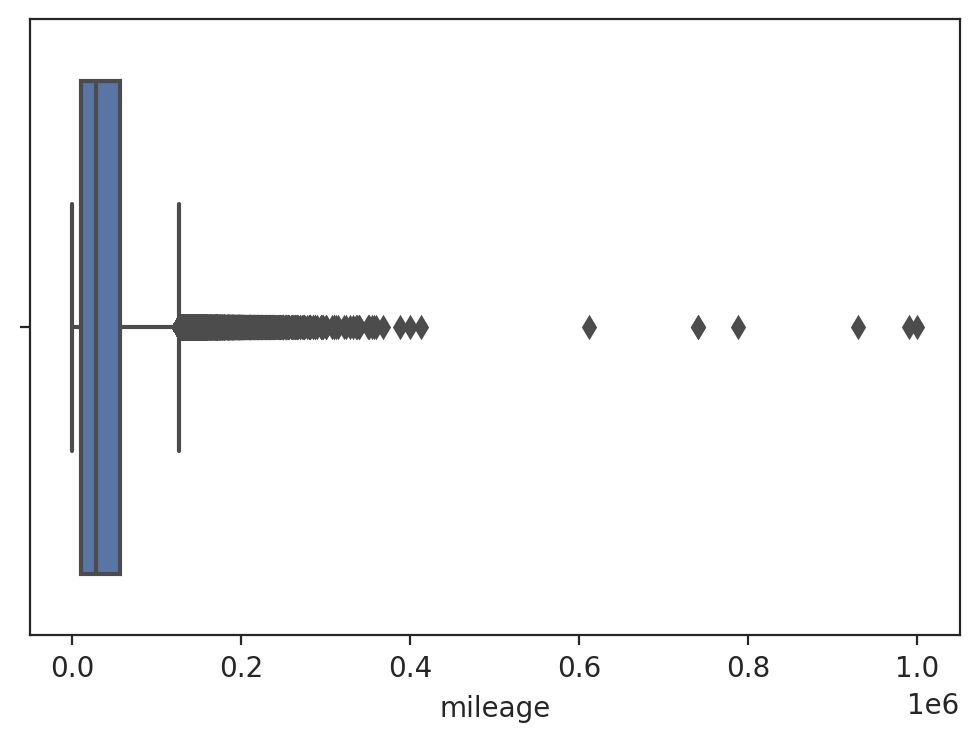

In [ ]:
sns.boxplot(data = df_car, x = 'mileage')

<Axes: xlabel='mileage'>

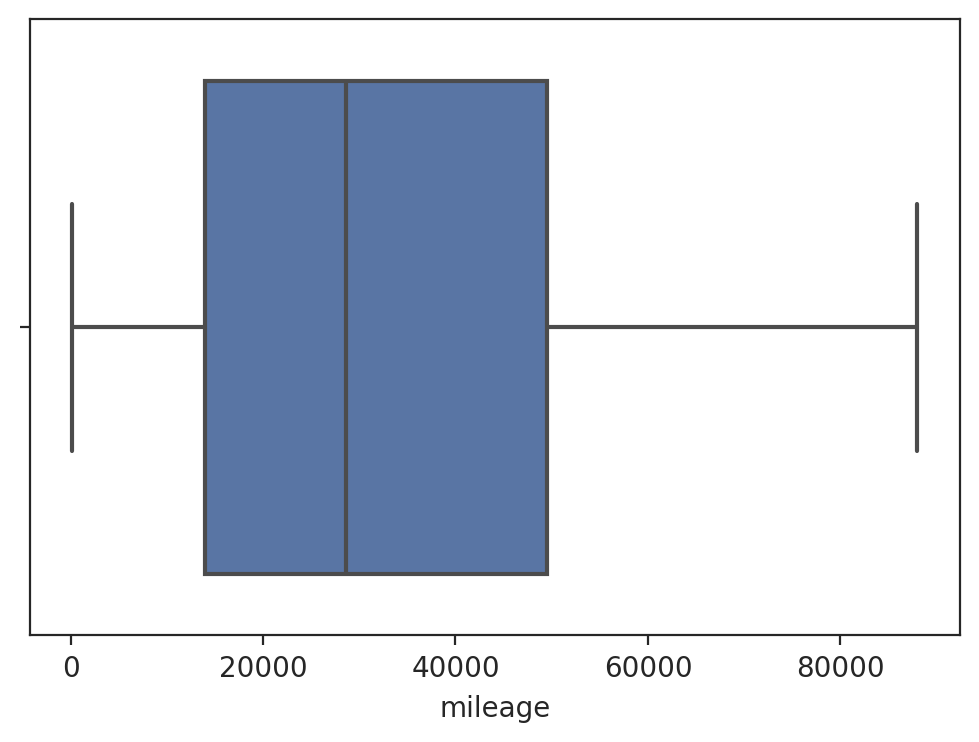

In [ ]:
 # Subset data: Remove outliers for numeric
lo_m, hi_m = df_car["mileage"].quantile([0.1, 0.9])
mask_m = df_car["mileage"].between(lo_m, hi_m)
df_car = df_car[mask_m]

sns.boxplot(data = df_car, x = 'mileage')

<Axes: xlabel='year_of_registration'>

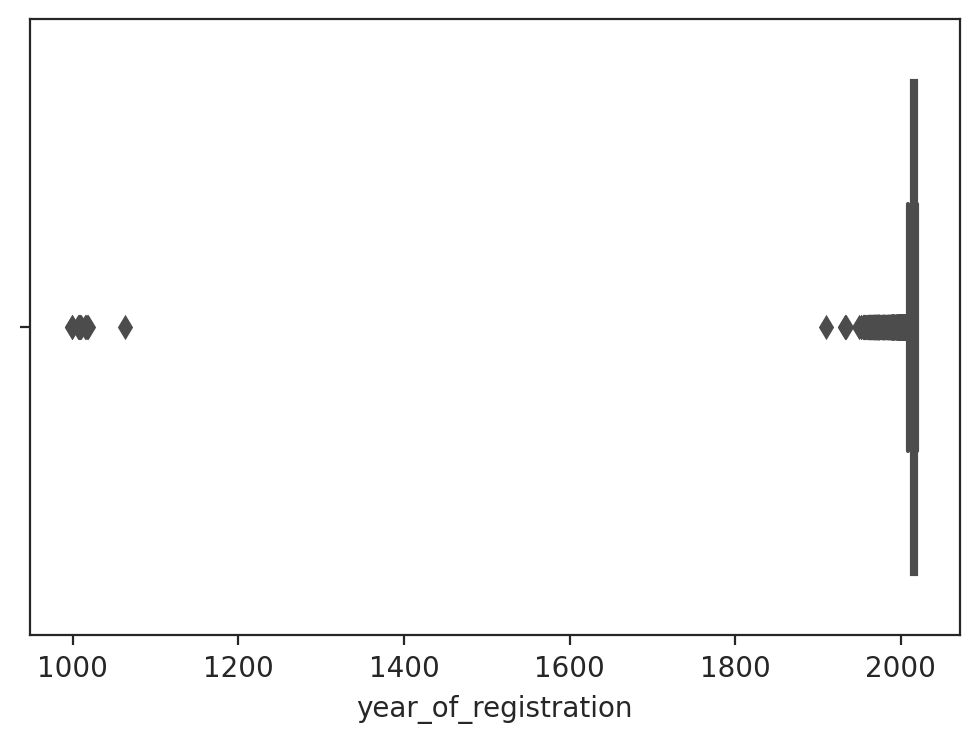

In [ ]:
sns.boxplot(data = df_car, x = 'year_of_registration')

<Axes: xlabel='year_of_registration'>

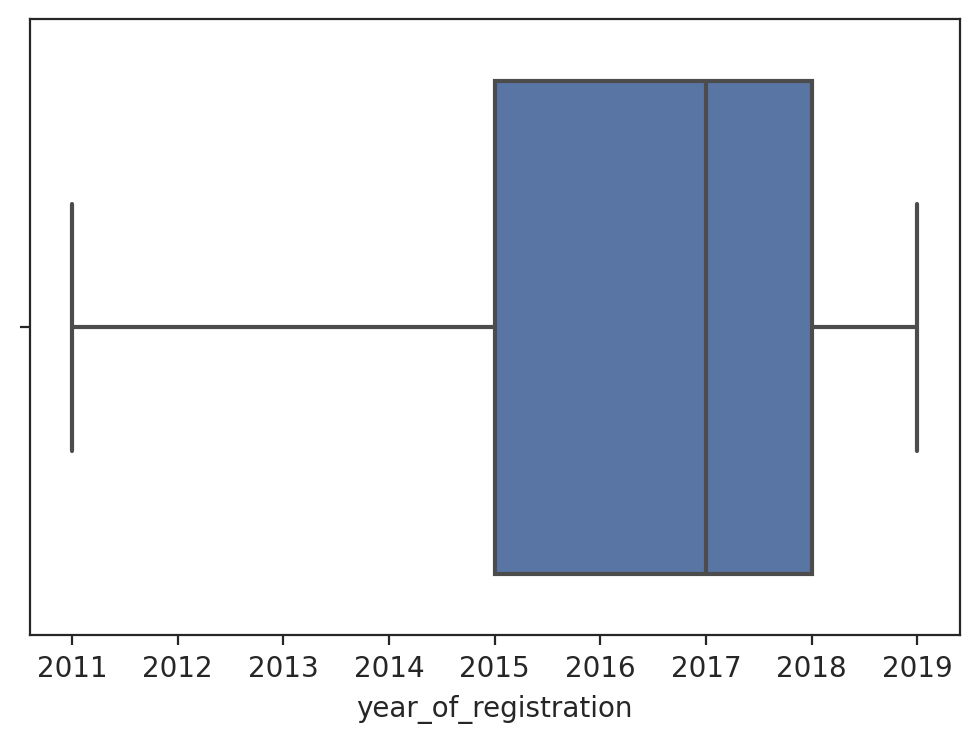

In [ ]:
# Subset data: Remove outliers for numeric
lo_y, hi_y = df_car["year_of_registration"].quantile([0.1, 0.9])
mask_y = df_car["year_of_registration"].between(lo_y, hi_y)
df_car = df_car[mask_y]

sns.boxplot(data = df_car, x = 'year_of_registration')

In [ ]:
# Convert the column to numeric for reg_code
df_car['reg_code'].replace('nan', np.nan, inplace = True)

df_car['reg_code'] = pd.to_numeric(df_car['reg_code'], errors = 'coerce')

<Axes: xlabel='reg_code'>

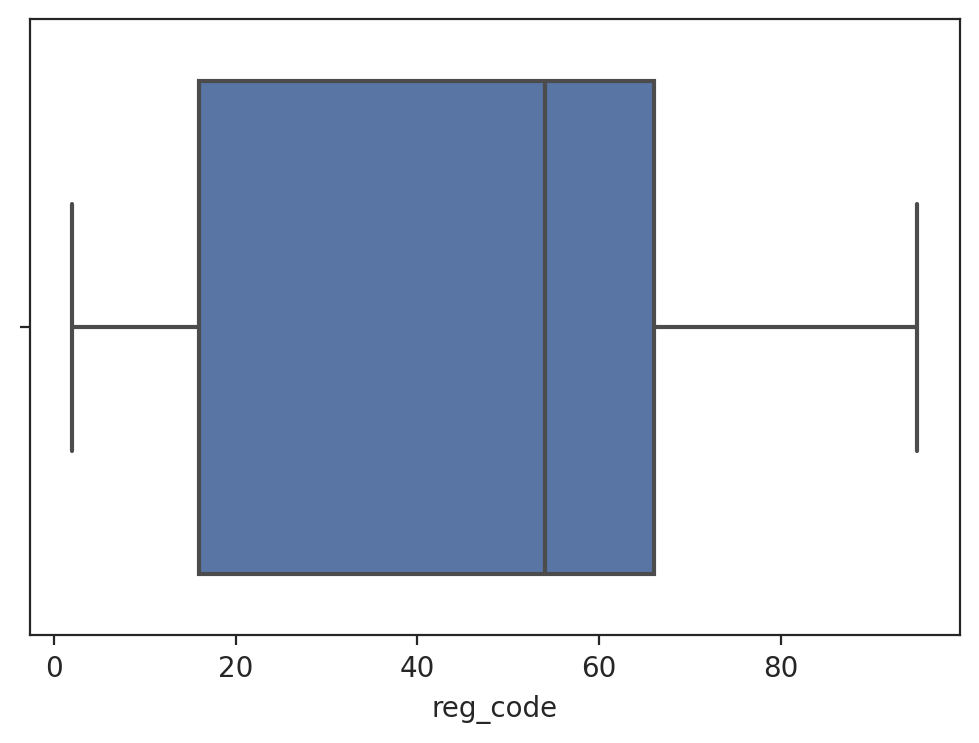

In [ ]:
sns.boxplot(data = df_car, x = 'reg_code')

<Axes: xlabel='reg_code'>

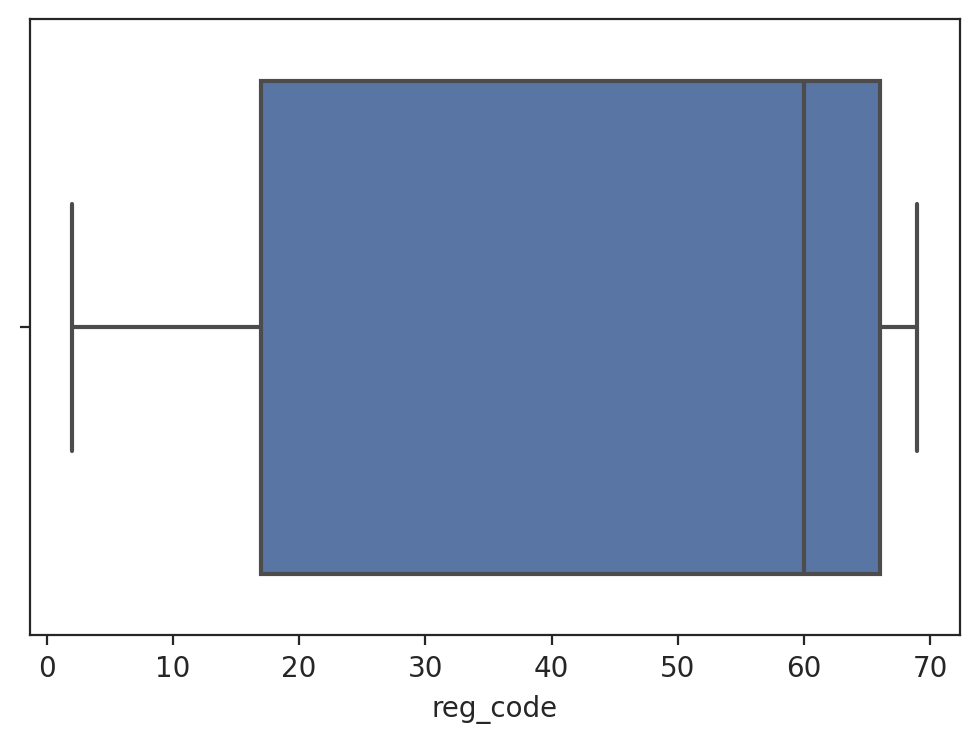

In [ ]:
# Convert the column to numeric for reg_code
df_car['reg_code'].replace('nan', np.nan, inplace = True)

df_car['reg_code'] = pd.to_numeric(df_car['reg_code'], errors = 'coerce')

sns.boxplot(data = df_car, x = 'reg_code')

In [ ]:
 # Subset data: Remove outliers for numeric
lo_r, hi_r = df_car["reg_code"].quantile([0.1, 0.9])
mask_r = df_car["reg_code"].between(lo_r, hi_r)
df = df_car[mask_r]

In [ ]:
 # Subset data: Remove outliers for numeric
lo_m, hi_m = df_car["mileage"].quantile([0.1, 0.9])
mask_m = df_car["mileage"].between(lo_r, hi_r)
df = df_car[mask_m]

<Axes: xlabel='reg_code'>

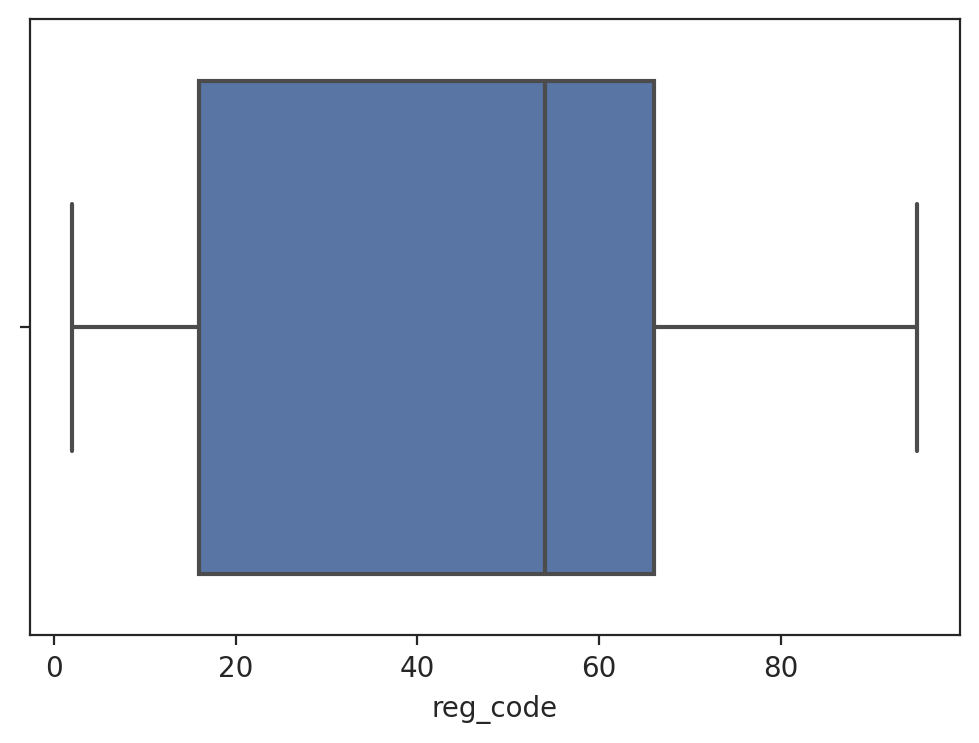

In [ ]:
sns.boxplot(data = df_car, x = 'reg_code')

<Axes: xlabel='reg_code'>

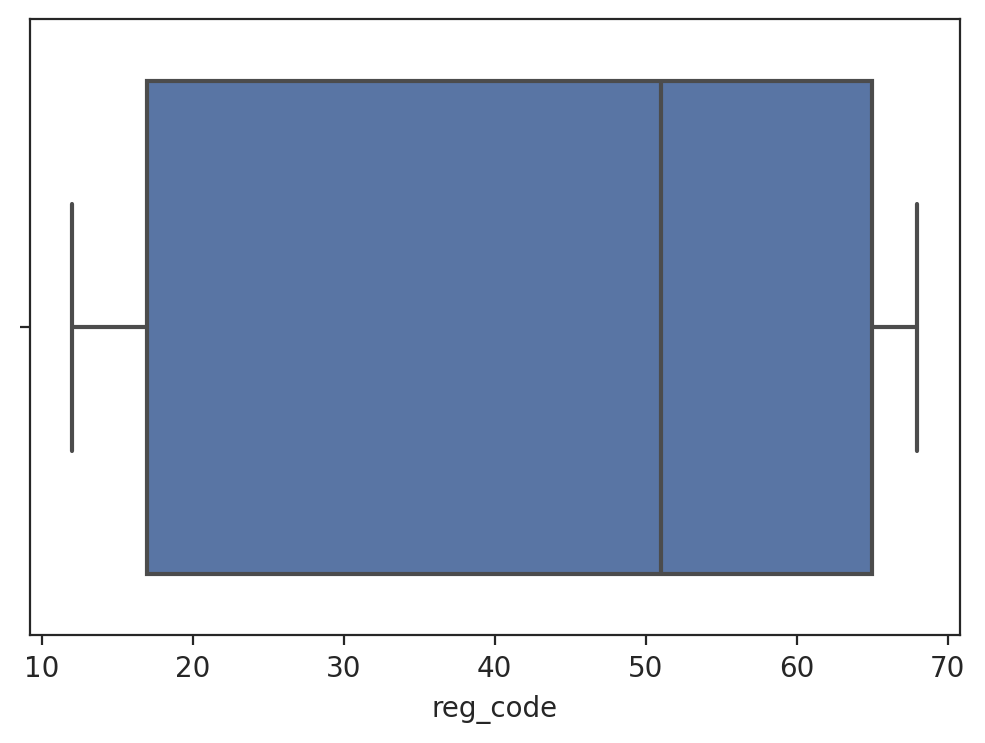

In [ ]:
sns.boxplot(data = df, x = 'reg_code')

In [ ]:
from sklearn.compose import ColumnTransformer


target = 'price'
cat_feat = ['standard_colour', 'standard_make', 'standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type'  ]
num_feat = ['mileage', 'reg_code', 'year_of_registration']

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

knn_pp_cat = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, drop='if_binary'),
    KNeighborsClassifier(n_neighbors=11)
)




In [ ]:
knn_pp_cat.fit(X_train[cat_feat], y_train)

In [ ]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler())
    ]
)

In [ ]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False, drop='if_binary')),
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feat),
        ("cat", categorical_transformer, cat_feat),
    ]
)

In [ ]:
preprocessor.fit_transform(X_train)

In [ ]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=11))]
)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
imp = SimpleImputer(missing_values=0, strategy='median').set_output(transform='pandas')

In [ ]:
# Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   368694 non-null  float64
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 28.0+ MB


In [ ]:
# Convert the "year_of_registration	" column from numeric to object (string) data type
df_car_c['year_of_registration'] = df_car_c['year_of_registration'].astype(str)


In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                401878 non-null  float64
 1   standard_colour        396627 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  object 
 6   price                  402005 non-null  int64  
 7   body_type              401168 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              401404 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 28.0+ MB


In [ ]:
# Calculate the mean of the "Value" column
mean_value = df_car_c[['mileage', 'price']].mean()

# Calculate the mode of the "Value" column
mode_value = df_car_c[['standard_colour', 'standard_make', 'standard_model',
        'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type']].mode().iloc[0]
[mean_value, mode_value]


[mileage    37743.595656
 price      17341.965799
 dtype: float64,
 standard_colour             Black
 standard_make                 BMW
 standard_model               Golf
 vehicle_condition            USED
 year_of_registration       2017.0
 body_type               Hatchback
 fuel_type                  Petrol
 Name: 0, dtype: object]

In [ ]:
df_car_c.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:


# Replace missing values with the mean for numeric columns
num_col = df_car_c.select_dtypes(include=[np.number]).columns
df_car_c[num_col] = df_car_c[num_col].fillna(df_car_c[num_col].mean())

# Replace missing values with the mode for categorical columns
cat_col = df_car_c.select_dtypes(include=['object']).columns
df_car_c[cat_col] = df_car_c[cat_col].fillna(df_car_c[cat_col].mode().iloc[0])

# Print the DataFrame after filling
df_car_c.head()


,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,nan,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:


# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')


# Identify numeric and categorical columns
num_cols = df_car_c.select_dtypes(include=[np.number]).columns
cate_cols = df_car_c.select_dtypes(include=['object']).columns


#[num_cols.shape, cate_cols.shape]
num_cols[0]


'mileage'

In [ ]:
# Impute missing values for numeric and categorical features

df_car_c[num_cols] = num_imputer.fit_transform(df_car[num_cols])

df_car_c[cate_cols] = cate_imputer.fit_transform(df_car[cate_cols])



In [ ]:
df_car_c[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   mileage  402005 non-null  float64
 1   price    402005 non-null  float64
dtypes: float64(2)
memory usage: 6.1 MB


In [ ]:
df_car_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   standard_colour        402005 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  object 
 6   price                  402005 non-null  float64
 7   body_type              402005 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), object(7)
memory usage: 28.0+ MB


In [ ]:
# Get the total count of missing values in each column
df_car_c.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
df_car_c.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970.0,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000.0,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000.0,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995.0,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995.0,SUV,False,Diesel


In [ ]:
df_car_c.iloc[0,0]

0.0

In [ ]:
# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])

In [ ]:
# Create separate imputers for numeric and categorical features
num_imputer = SimpleImputer(strategy='mean')
cate_imputer = SimpleImputer(strategy='most_frequent')

# Identify numeric, categorical, boolean columns
num_cols = car_df.select_dtypes(include=['number']).columns
cate_cols = car_df.select_dtypes(include=['object']).columns
bool_cols = car_df.select_dtypes(include=['bool']).columns

# Impute missing values for numeric and categorical features
car_df[num_cols] = num_imputer.fit_transform(car_df[num_cols])
car_df[cate_cols] = cate_imputer.fit_transform(car_df[cate_cols])


# Impute missing values for boolean features with the most frequent value
for i in bool_cols:
    most_frequent_value = car_df[i].mode()[0]
    car_df[i].fillna(most_frequent_value, inplace=True)



In [ ]:
# Get the total count of missing values in each column
car_df.isnull().sum()


mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Melt the DataFrame to long format for boxplot
df_melted = pd.melt(car_df, id_vars=[], value_vars=car_df.columns, var_name='standard_colour')

# Create a boxplot for multiple categorical columns
plt.figure(figsize=(12, 8))
sns.boxplot(x='standard_colour', data=df_melted, palette='Set2')
plt.title('Boxplot of Category Counts for Several Categorical Columns')
plt.show()


TypeError: ignored

<Figure size 1200x800 with 0 Axes>

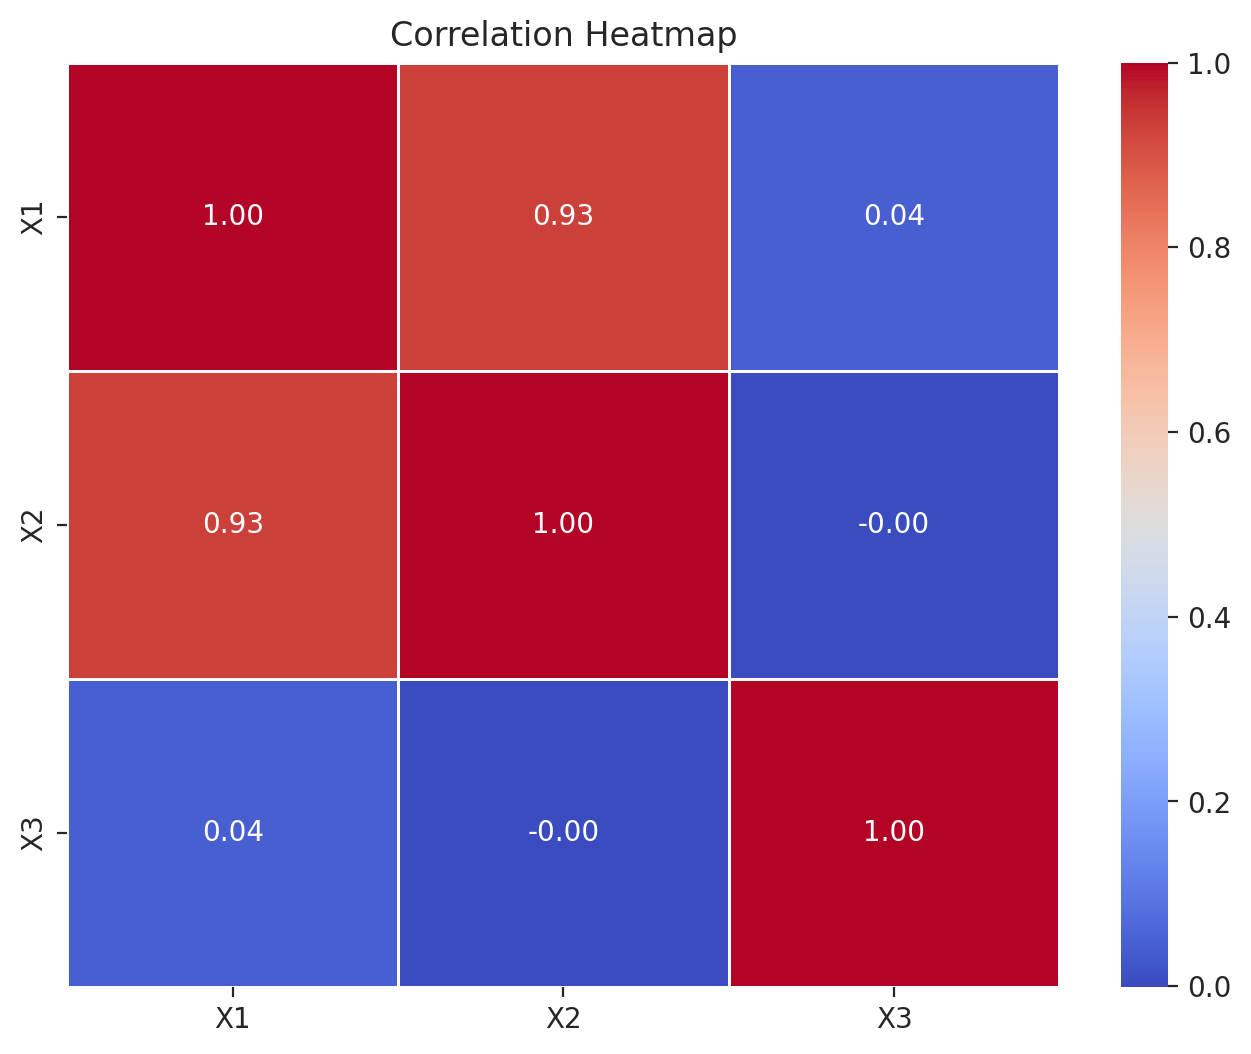

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame with three correlated variables
data = {
    'X1': np.random.rand(100),
    'X2': 2 * np.random.rand(100) + 0.5,
    'X3': 3 * np.random.rand(100) - 1
}

df = pd.DataFrame(data)

# Introducing multicollinearity by creating a linear relationship between X1 and X2
df['X2'] = df['X1'] + np.random.normal(scale=0.1, size=len(df))

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


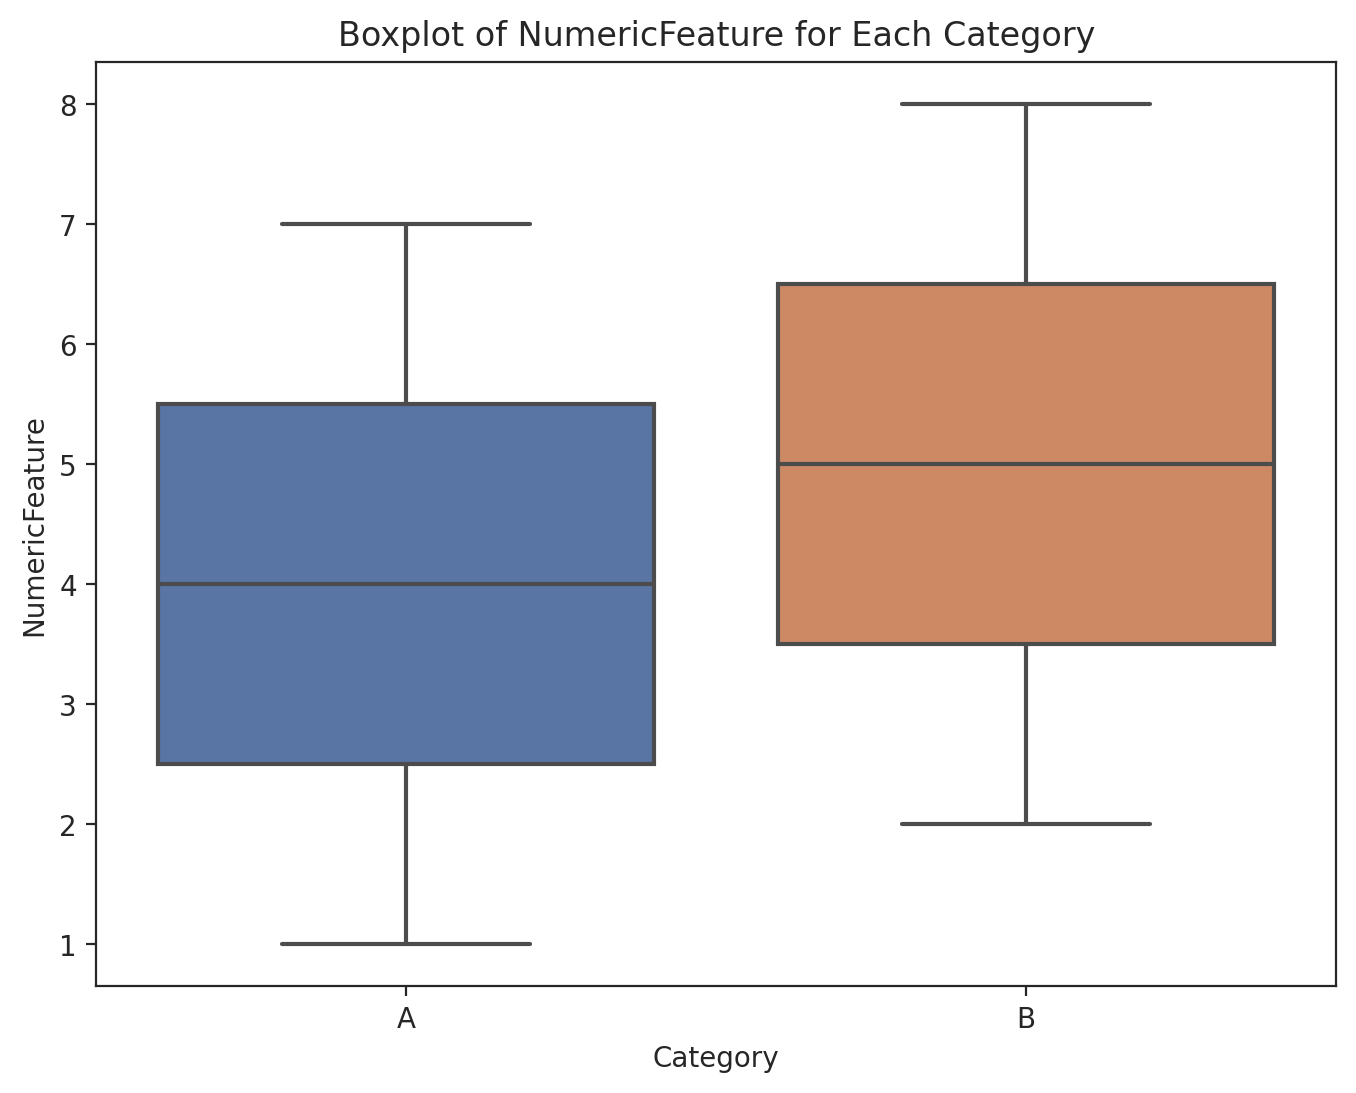

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame with a categorical feature and a numerical feature
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'NumericFeature': [1, 2, 3, 4, 5, 6, 7, 8]
}

df = pd.DataFrame(data)

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='NumericFeature', data=df)
plt.title('Boxplot of NumericFeature for Each Category')
plt.show()
